In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
fifa19 = pd.read_csv(r"C:\Users\shali\Desktop\PYTHON_Nit\2. JULY_TASK\EDA\Seaborn - Sport\FIFA.csv")

In [6]:
fifa19.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [7]:
fifa19.tail()

Unnamed: 0      ID                Name  Age  \
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                   Club  ... Composure Marking StandingTackle  SlidingTackle  \
18202   Crewe Alexandra  ...      45.0    40.0           48.0           47.0   
18203    Trelleborgs FF  ...      42.0    22.0           15.0           19.0   
18204  Cambridge United  ...      41.0    32.0           13.0           11.0   
18205   Tranmere Rovers  ...      46.0    20.0           25.0           27.0   
18206   Tranmere Rovers  ...      43.0    40.0           43.0           50.0   

      GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
18202     10.0        13.0        7.0            8.0        9.0          €143K  
18203     10.0         9.0        9.0            5.0       12.0          €113K  
18204      6.0         5.0       10.0            6.0       13.0          €165K  
18205     14.0         6.0       14.0            8.0        9.0          €143K  
18206     10.0        15.0        9.0           12.0        9.0          €165K  

[5 rows x 89 columns]

In [8]:
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [9]:
fifa19.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [10]:
fifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [11]:
fifa19.isnull()

Unnamed: 0     ID   Name    Age  Photo  Nationality   Flag  Overall  \
0           False  False  False  False  False        False  False    False   
1           False  False  False  False  False        False  False    False   
2           False  False  False  False  False        False  False    False   
3           False  False  False  False  False        False  False    False   
4           False  False  False  False  False        False  False    False   
...           ...    ...    ...    ...    ...          ...    ...      ...   
18202       False  False  False  False  False        False  False    False   
18203       False  False  False  False  False        False  False    False   
18204       False  False  False  False  False        False  False    False   
18205       False  False  False  False  False        False  False    False   
18206       False  False  False  False  False        False  False    False   

       Potential   Club  ...  Composure  Marking  StandingTackle  \
0          False  False  ...      False    False           False   
1          False  False  ...      False    False           False   
2          False  False  ...      False    False           False   
3          False  False  ...      False    False           False   
4          False  False  ...      False    False           False   
...          ...    ...  ...        ...      ...             ...   
18202      False  False  ...      False    False           False   
18203      False  False  ...      False    False           False   
18204      False  False  ...      False    False           False   
18205      False  False  ...      False    False           False   
18206      False  False  ...      False    False           False   

       SlidingTackle  GKDiving  GKHandling  GKKicking  GKPositioning  \
0              False     False       False      False          False   
1              False     False       False      False          False   
2              False     False       False      False          False   
3              False     False       False      False          False   
4              False     False       False      False          False   
...              ...       ...         ...        ...            ...   
18202          False     False       False      False          False   
18203          False     False       False      False          False   
18204          False     False       False      False          False   
18205          False     False       False      False          False   
18206          False     False       False      False          False   

       GKReflexes  Release Clause  
0           False           False  
1           False           False  
2           False           False  
3           False           False  
4           False           False  
...           ...             ...  
18202       False           False  
18203       False           False  
18204       False           False  
18205       False           False  
18206       False           False  

[18207 rows x 89 columns]

In [12]:
fifa19.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [13]:
fifa19['Body Type'].value_counts()

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

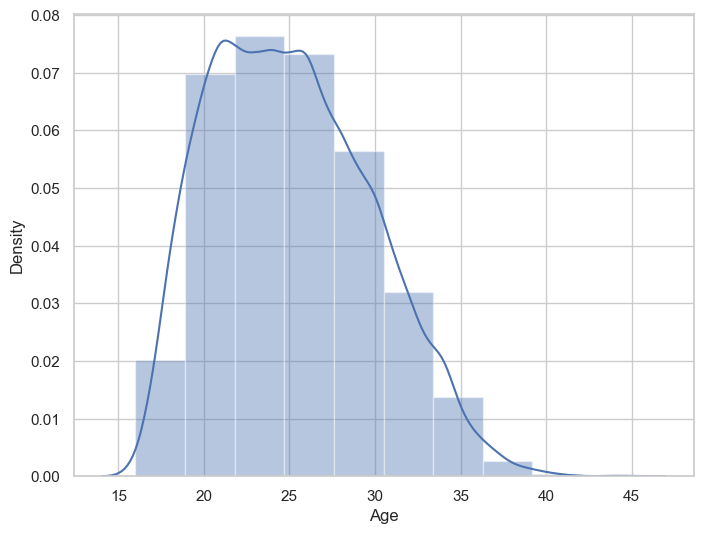

In [14]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19["Age"]
ax = sns.distplot(x, bins=10)
plt.show()

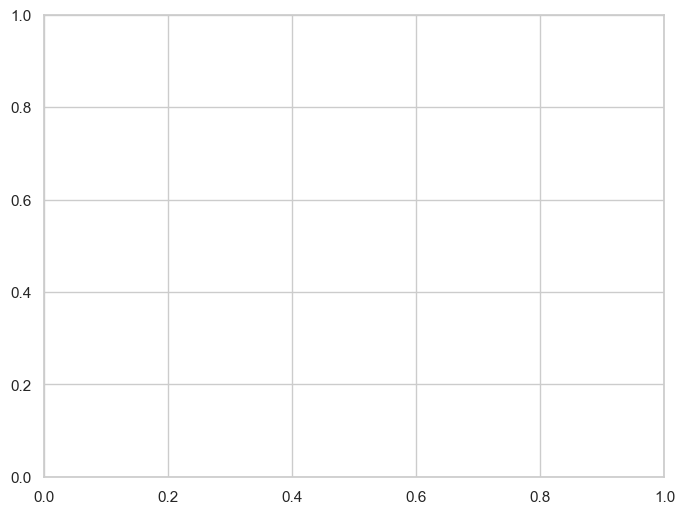

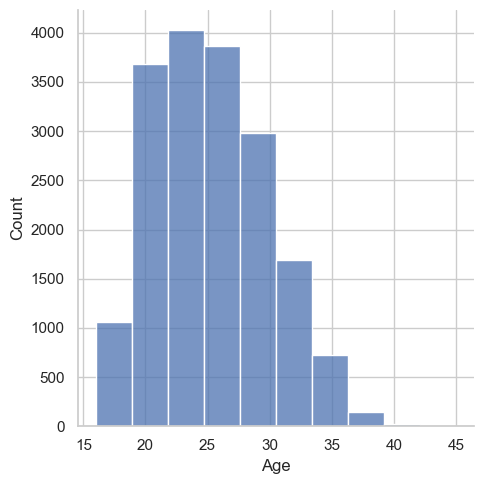

In [15]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19["Age"]
ax = sns.displot(x, bins=10)
plt.show()

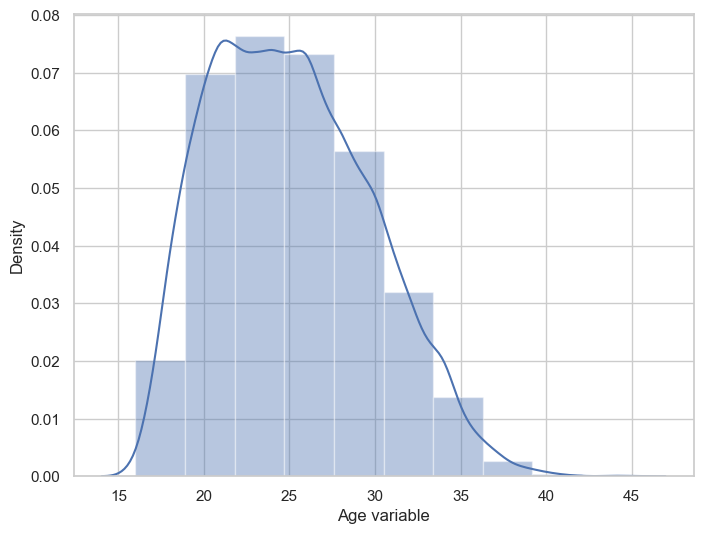

In [16]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10)
plt.show()

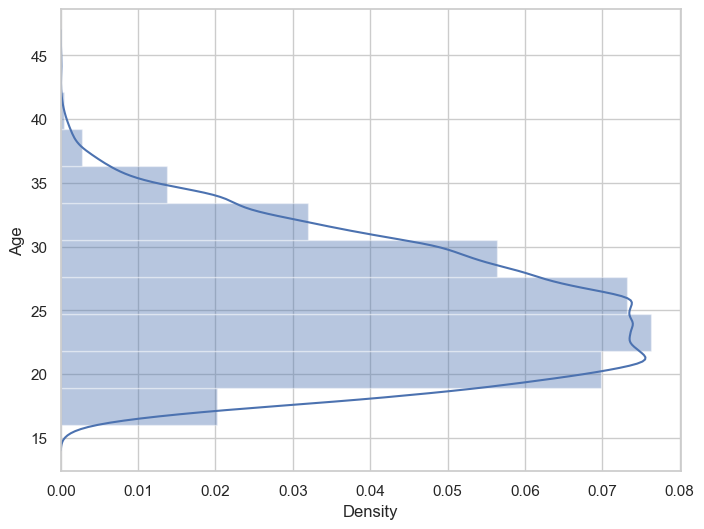

In [17]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10, vertical = True)
plt.show()

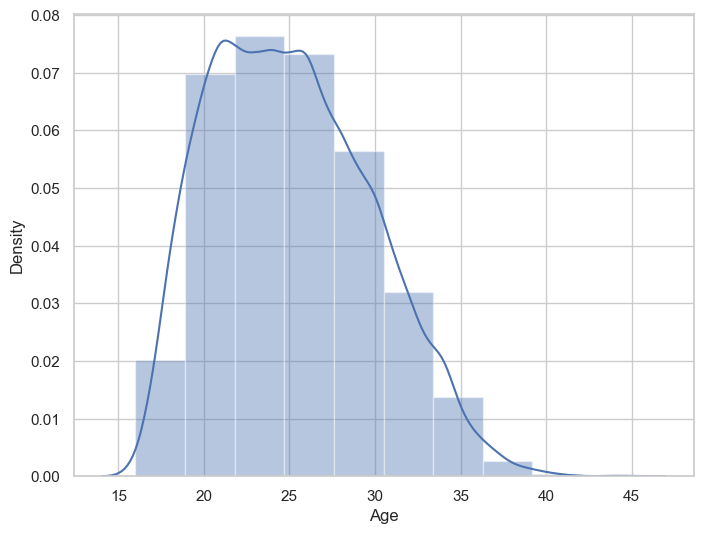

In [18]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, bins=10, vertical = False)
plt.show()

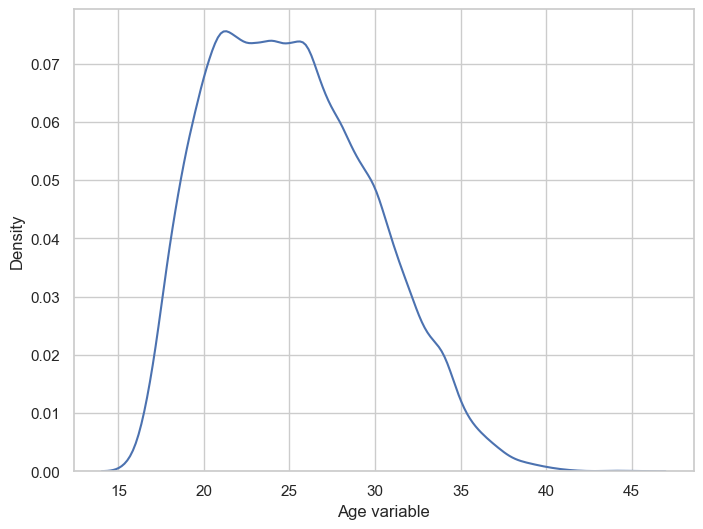

In [19]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x)
plt.show()

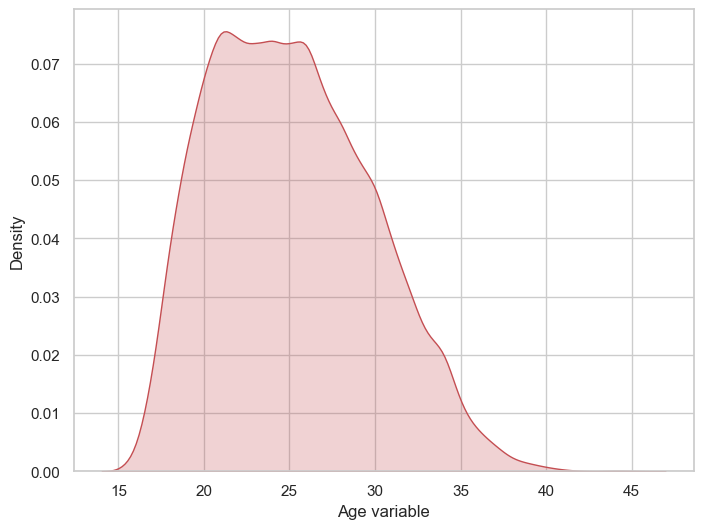

In [20]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

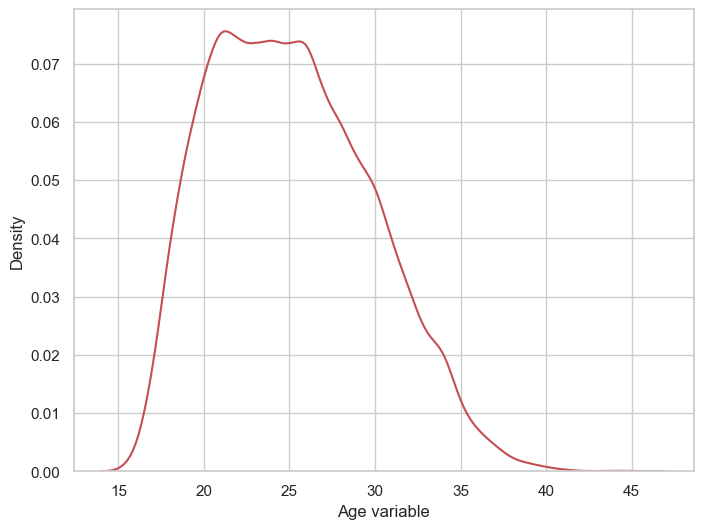

In [21]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=False, color='r')
plt.show()

In [22]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='yellow')
plt.show()

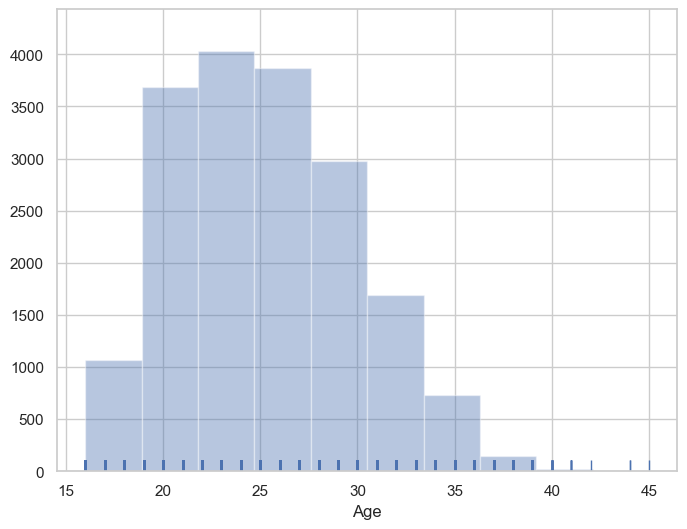

In [23]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

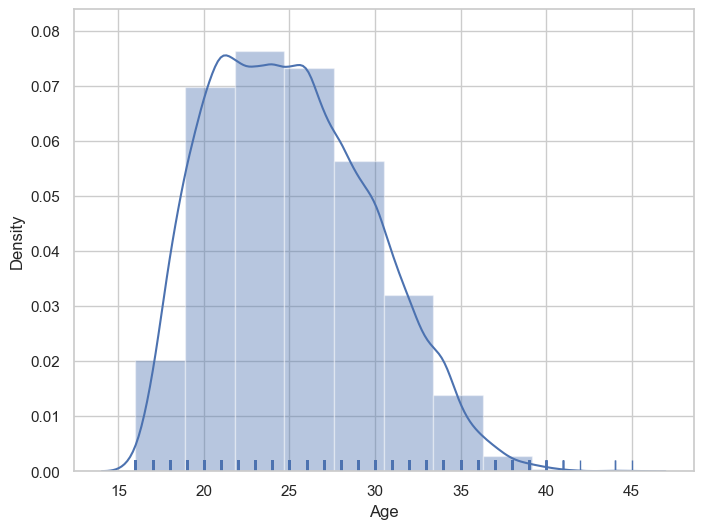

In [24]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, kde=True, rug=True, bins=10)
plt.show()

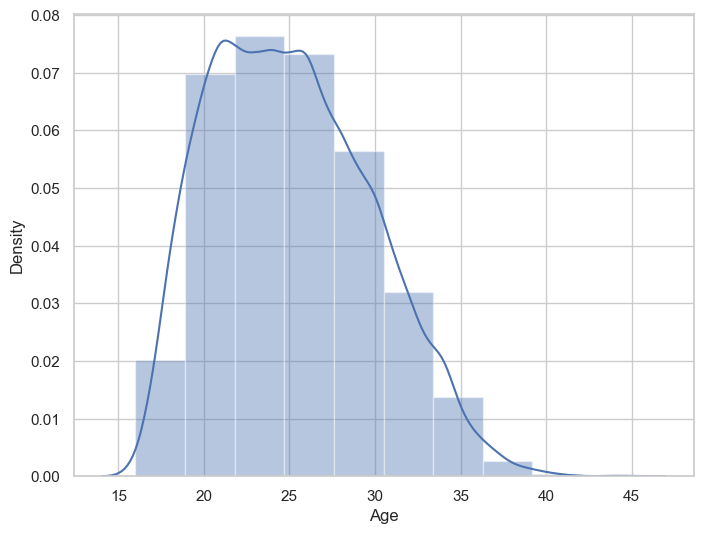

In [25]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, kde=True, rug=False, bins=10)
plt.show()

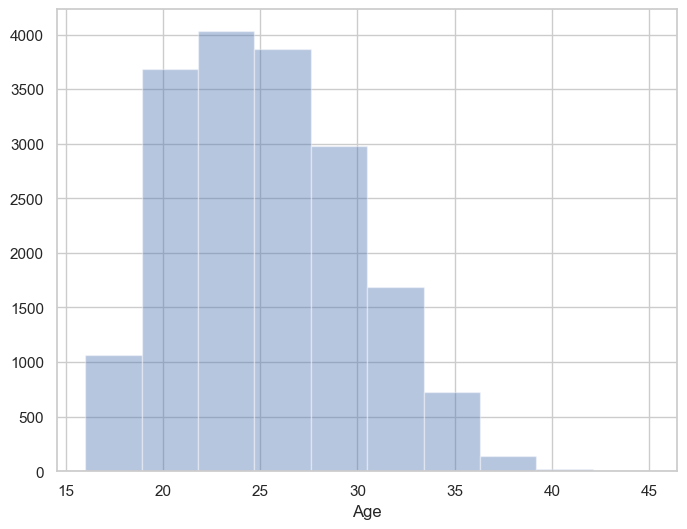

In [26]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, kde=False, rug=False, bins=10)
plt.show()

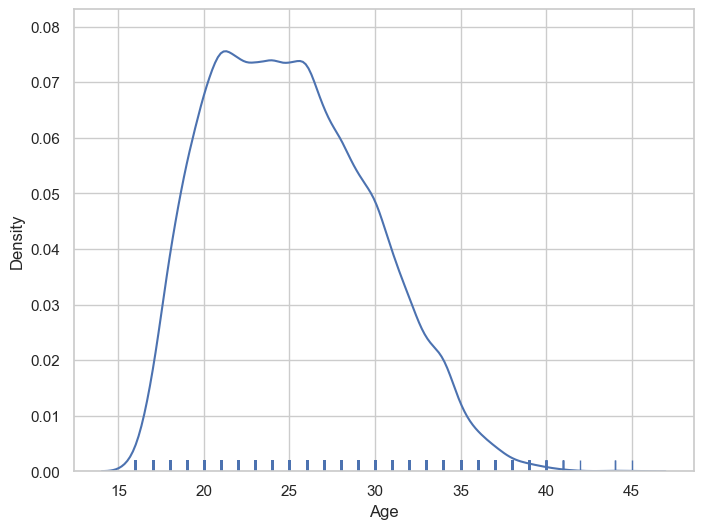

In [27]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, hist=False, rug=True, bins=10)
plt.show()

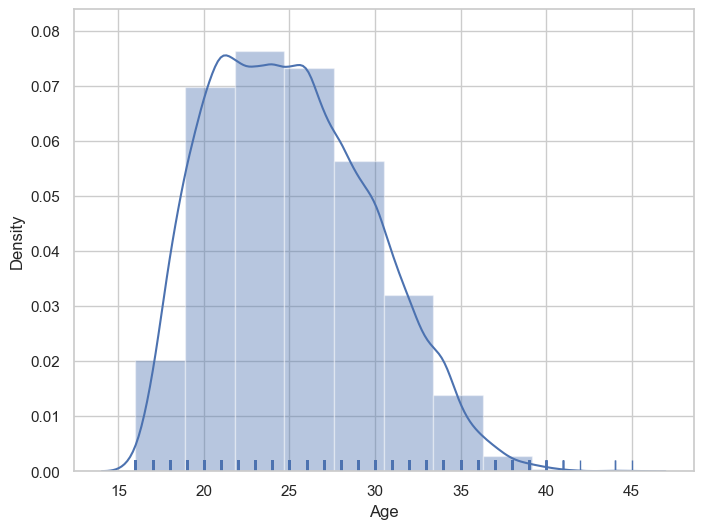

In [28]:
f, ax = plt.subplots(figsize=(8,6))
x = fifa19['Age']
ax = sns.distplot(x, hist=True, rug=True, bins=10)
plt.show()

In [29]:
fifa19['Preferred Foot'].nunique()

2

In [30]:
fifa19['Preferred Foot'].unique()

array(['Left', 'Right', nan], dtype=object)

In [31]:
fifa19['Preferred Foot'].value_counts()

Preferred Foot
Right    13948
Left      4211
Name: count, dtype: int64

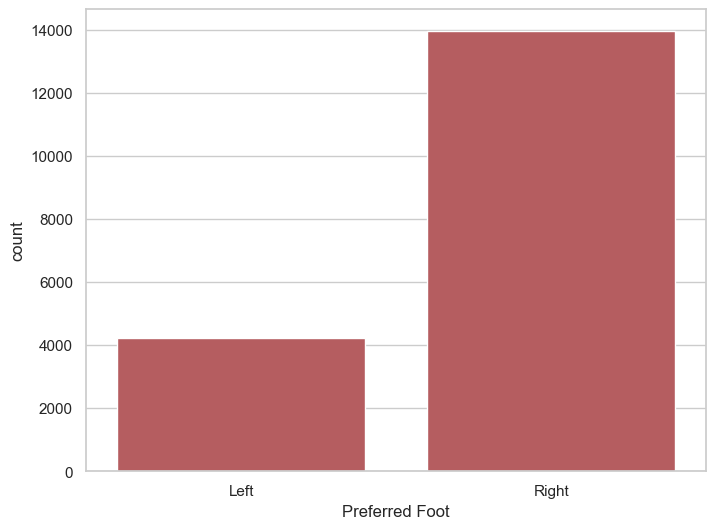

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", data=fifa19, color="r")
plt.show()

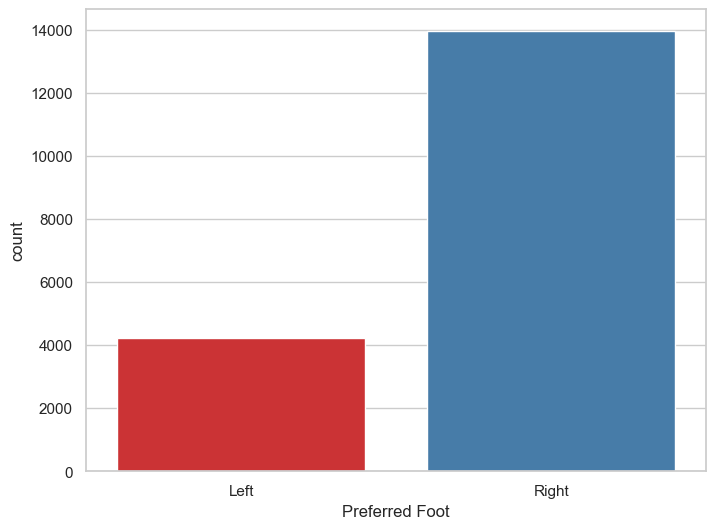

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", data=fifa19, palette="Set1")
plt.show()

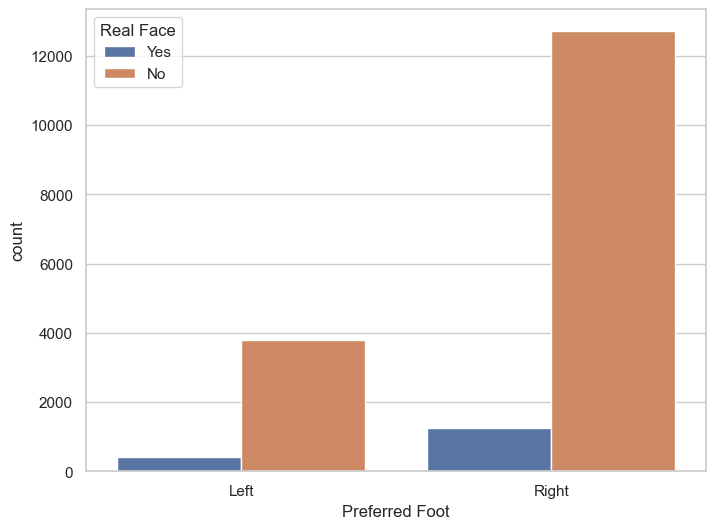

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa19)
plt.show()

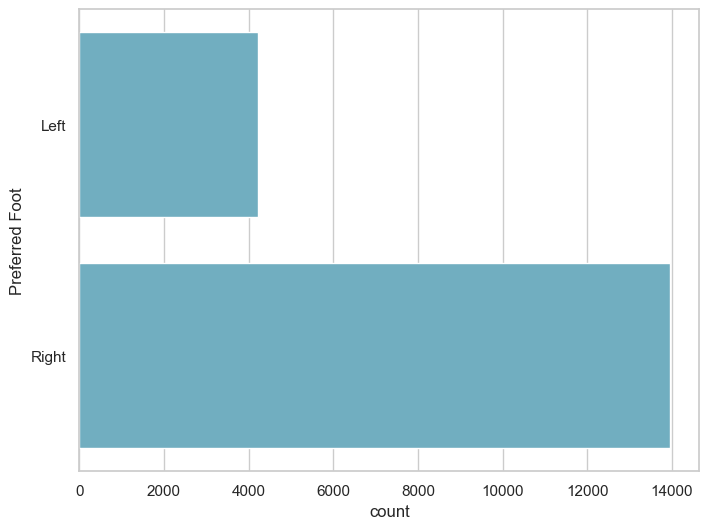

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y="Preferred Foot", data=fifa19, color="c")
plt.show()

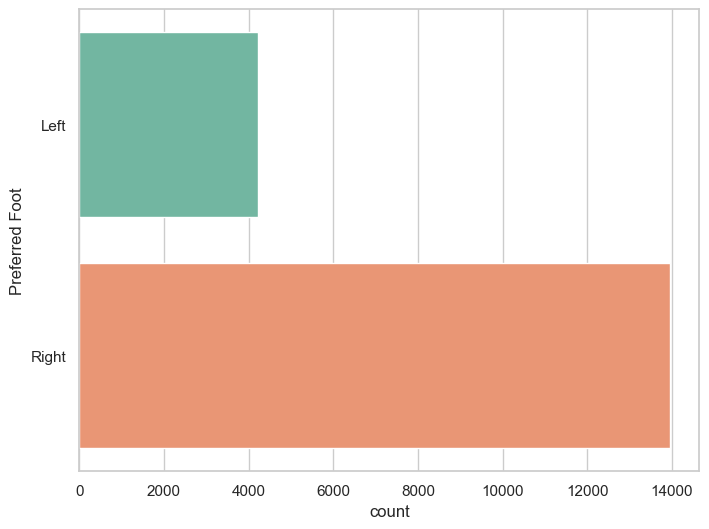

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y="Preferred Foot", data=fifa19, palette="Set2")
plt.show()

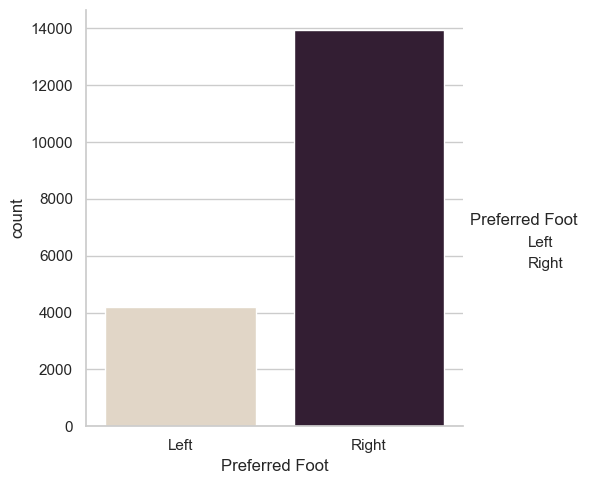

In [37]:
g = sns.catplot(x="Preferred Foot", kind="count", palette="ch:.25", data=fifa19)
plt.show()

In [38]:
fifa19['International Reputation'].nunique()

5

In [39]:
fifa19['International Reputation'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [40]:
fifa19['International Reputation'].value_counts()

International Reputation
1.0    16532
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

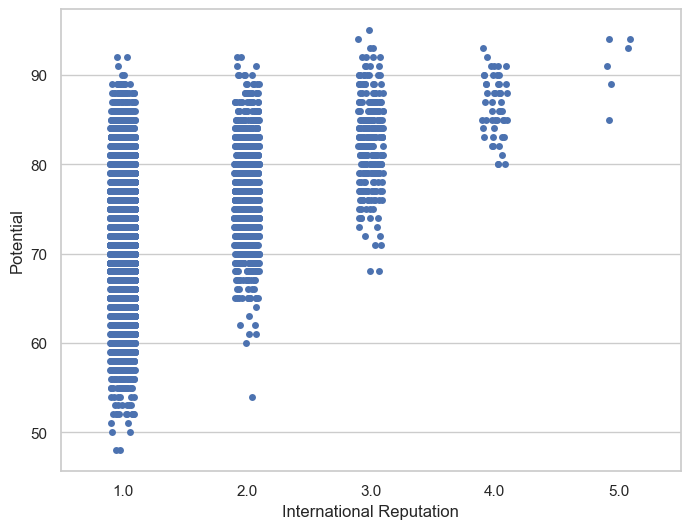

In [41]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

In [42]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19, palette="Set2")
plt.show()

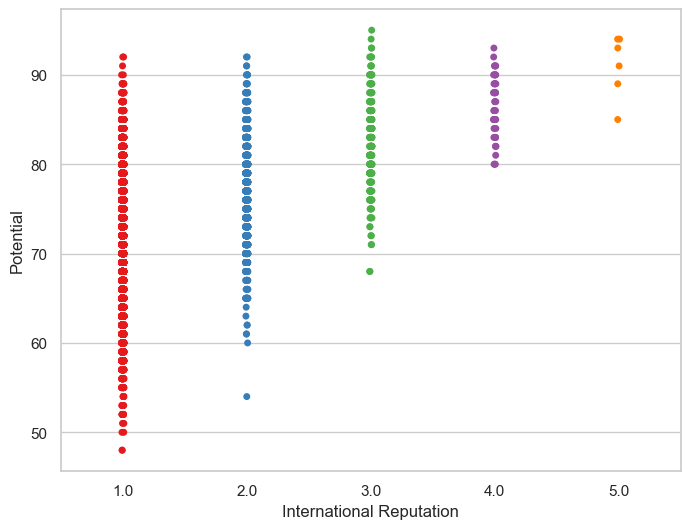

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", data=fifa19, jitter=0.01, palette="Set1")
plt.show()

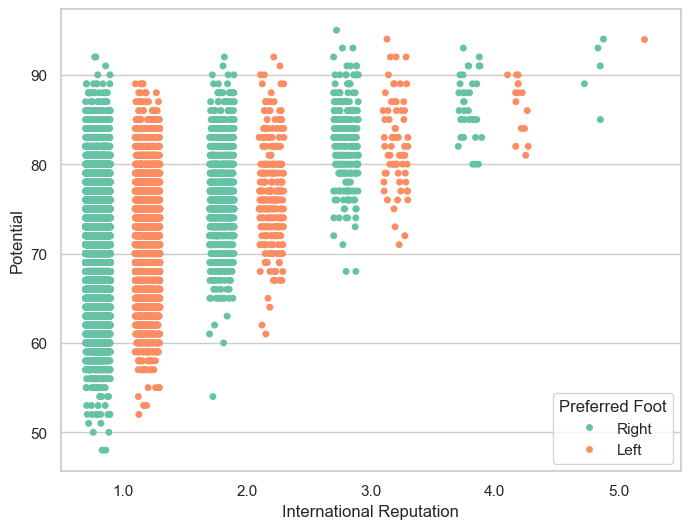

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, jitter=0.2, palette="Set2", dodge=True)
plt.show()

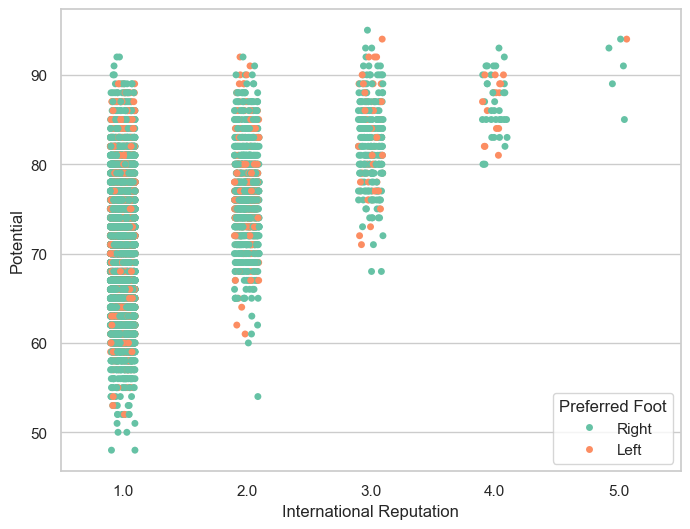

In [45]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, jitter=0.1, palette="Set2", dodge=False)
plt.show()

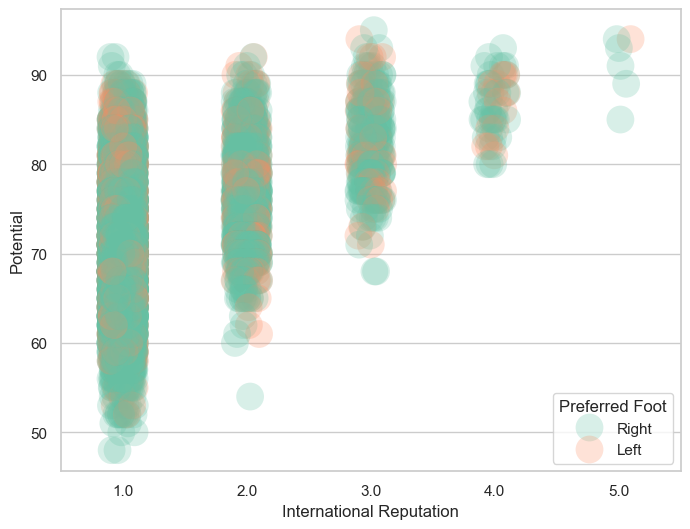

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=20, marker="o",
                   edgecolor="gray", alpha=.25)
plt.show()

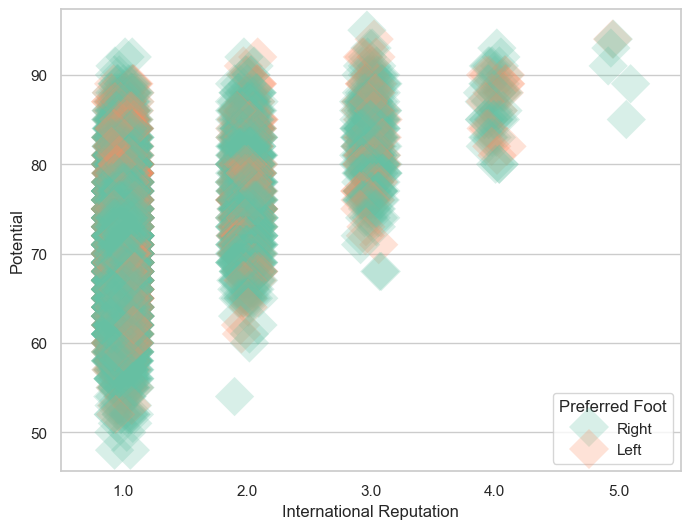

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)
plt.show()

In [48]:
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

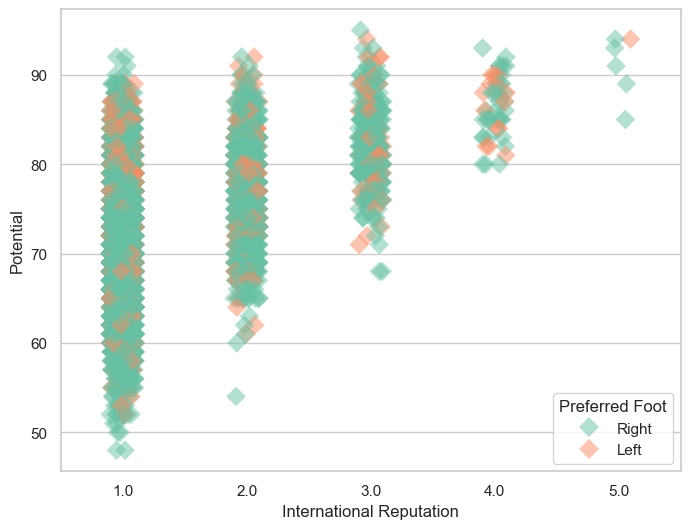

In [49]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
                   data=fifa19, palette="Set2", size=10, marker="D",
                   edgecolor="gray", alpha=.50)
plt.show()

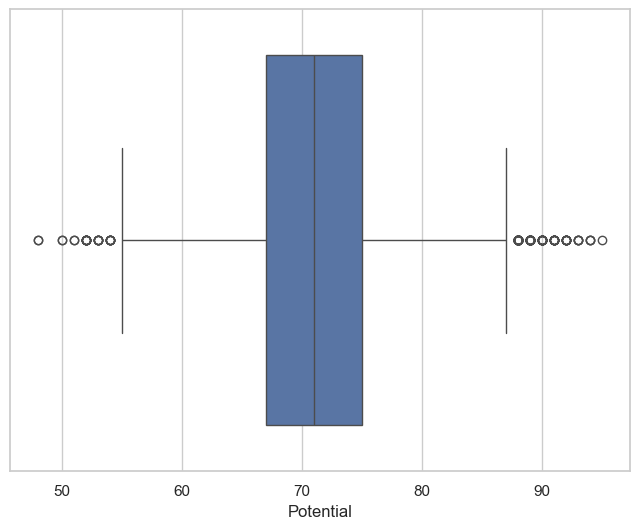

In [50]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa19["Potential"])
plt.show()

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=fifa19["Potential"], palette="Set2")
plt.show()

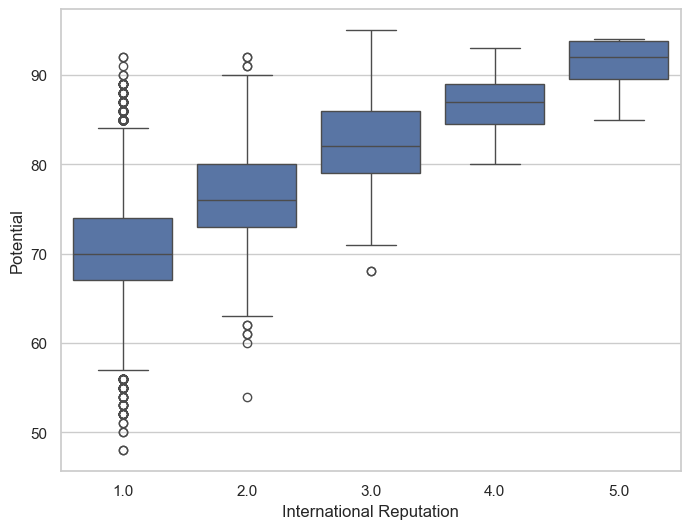

In [52]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

In [53]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", data=fifa19, palette="Set2")
plt.show()

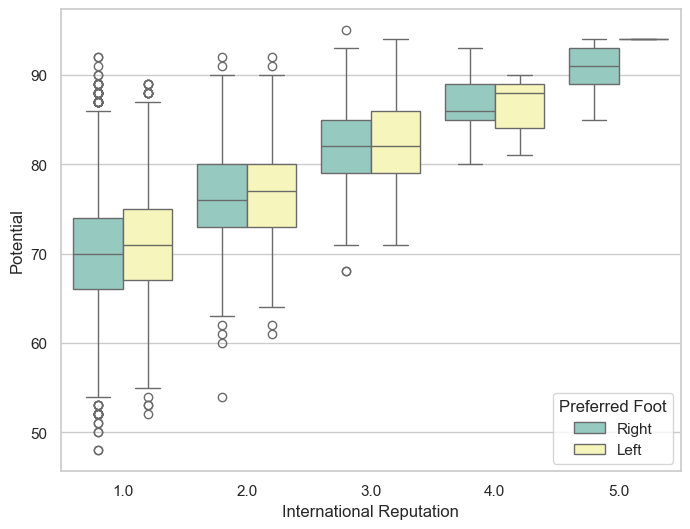

In [54]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set3")
plt.show()

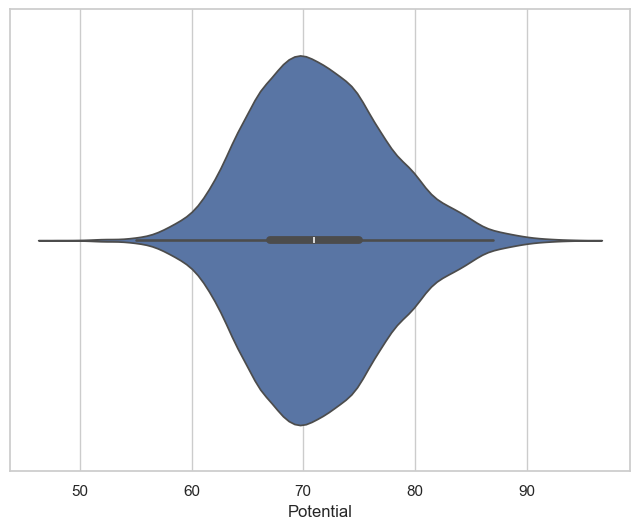

In [55]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x=fifa19["Potential"])
plt.show()

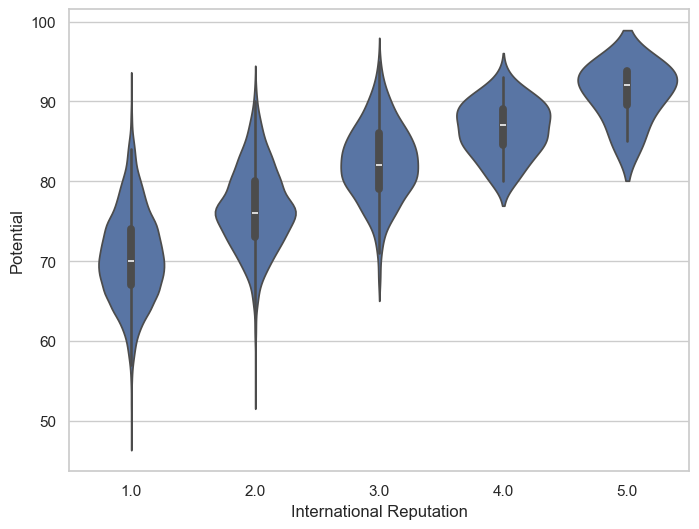

In [56]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

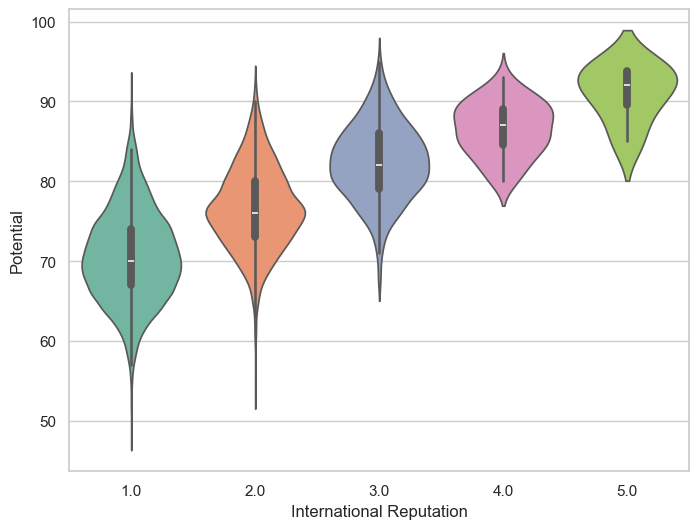

In [57]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", data=fifa19, palette="Set2")
plt.show()

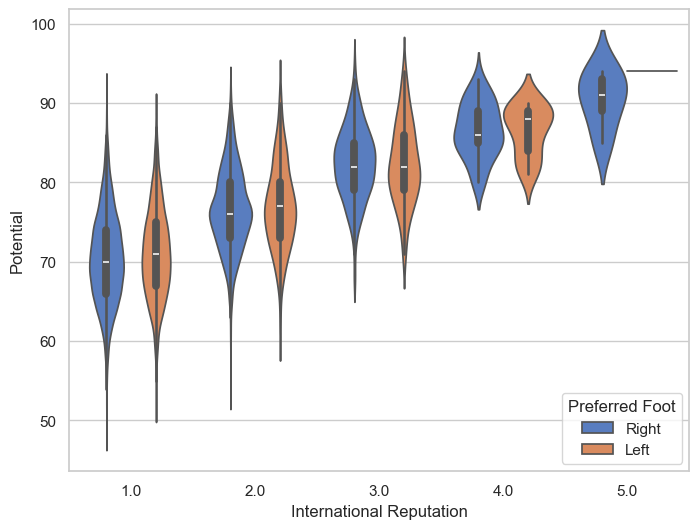

In [58]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, palette="muted")
plt.show()

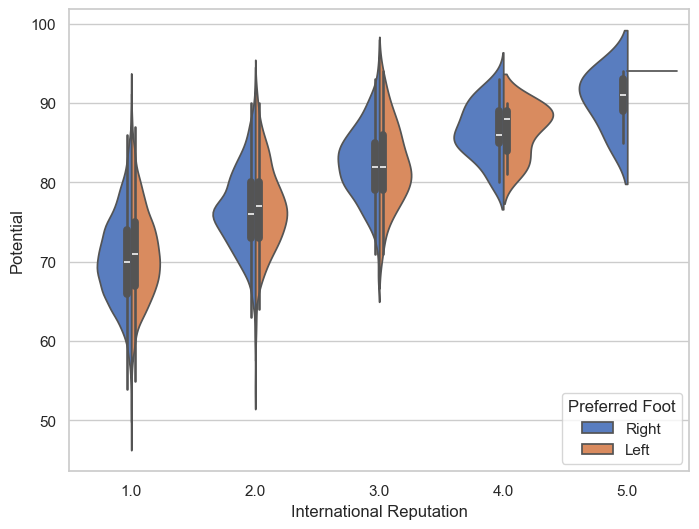

In [59]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
               data=fifa19, palette="muted", split=True)
plt.show()

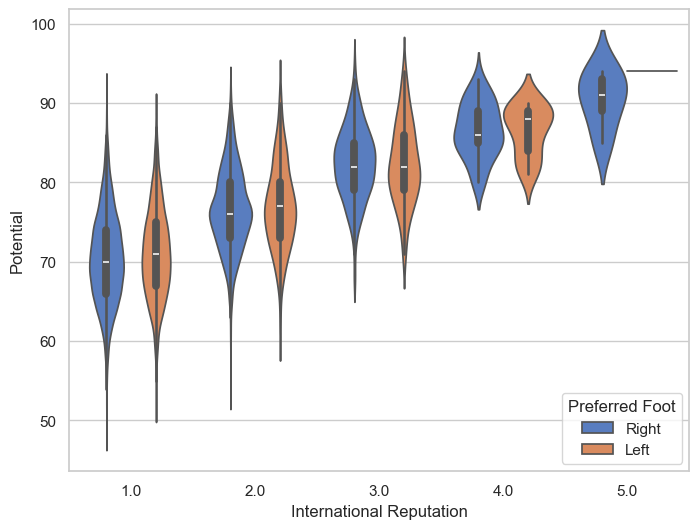

In [60]:
f, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
               data=fifa19, palette="muted", split=False)
plt.show()

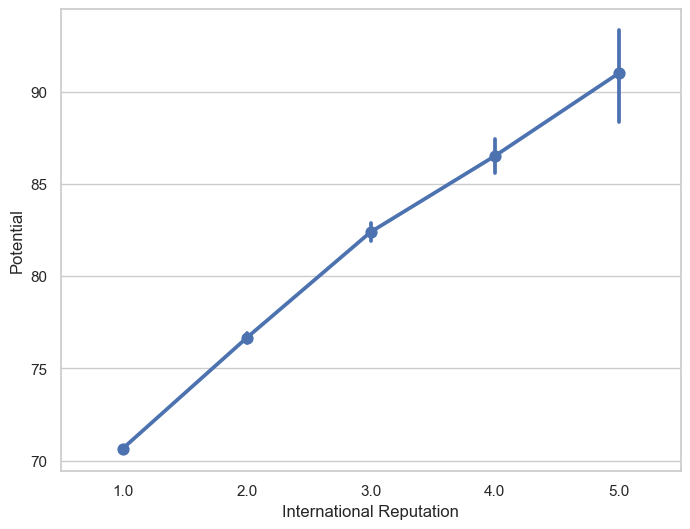

In [61]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

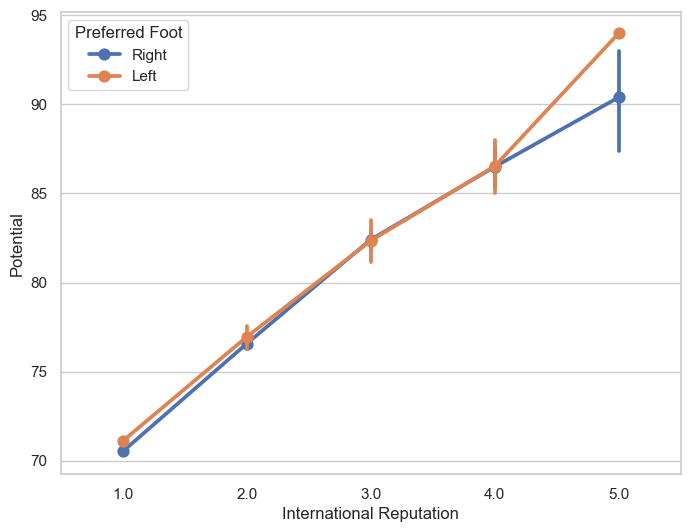

In [62]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

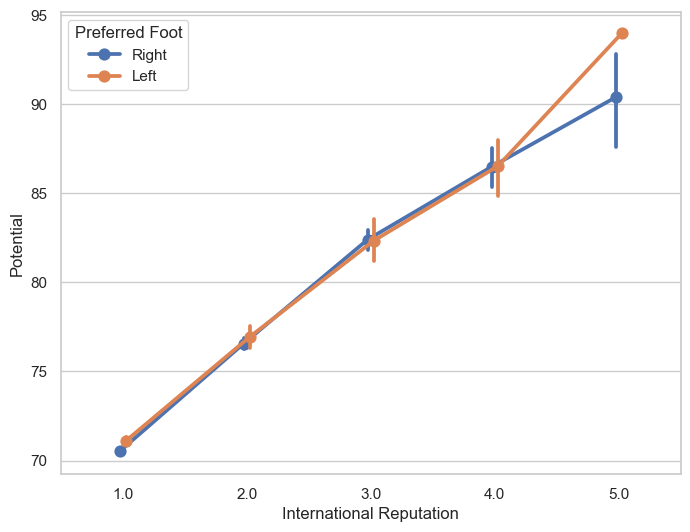

In [63]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, dodge=True)
plt.show()

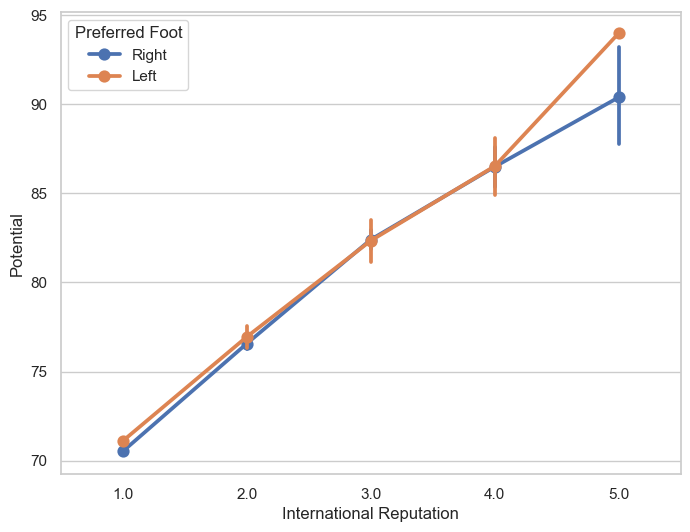

In [64]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19, dodge=False)
plt.show()

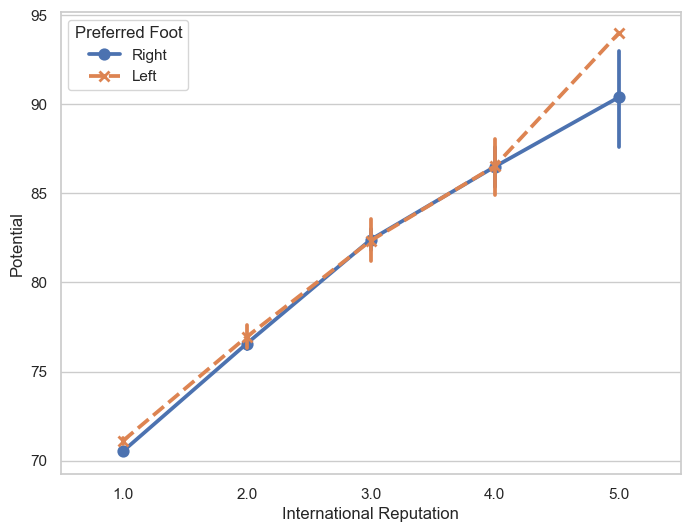

In [65]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="International Reputation", y="Potential", hue="Preferred Foot", 
              data=fifa19, markers=["o", "x"], linestyles=["-", "--"])
plt.show()

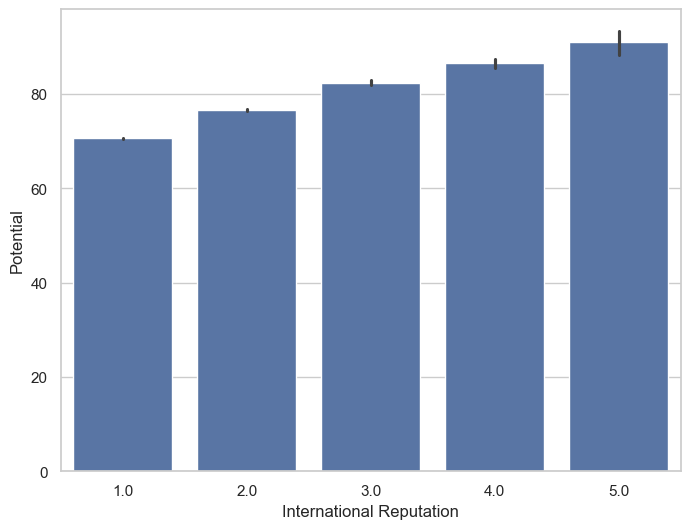

In [66]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19)
plt.show()

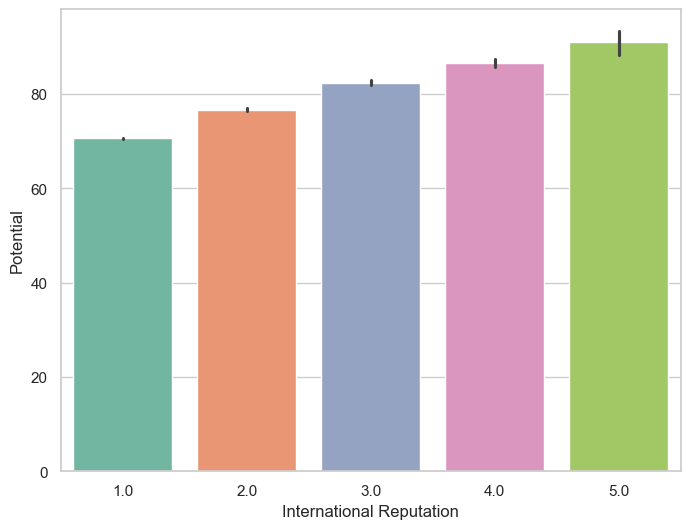

In [67]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, palette="Set2")
plt.show()

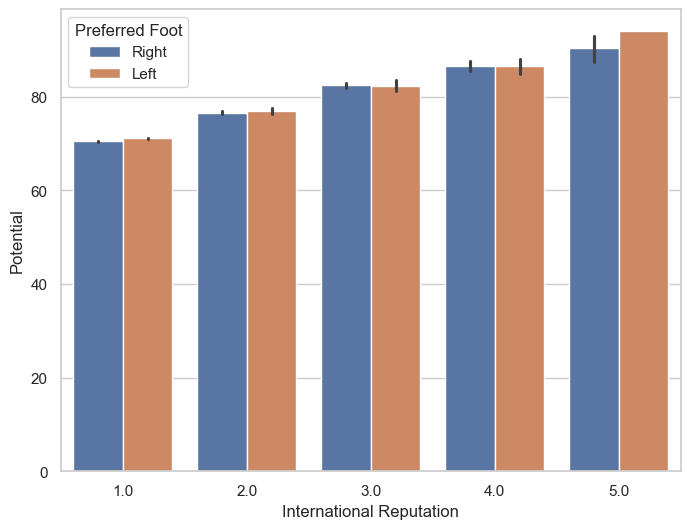

In [68]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

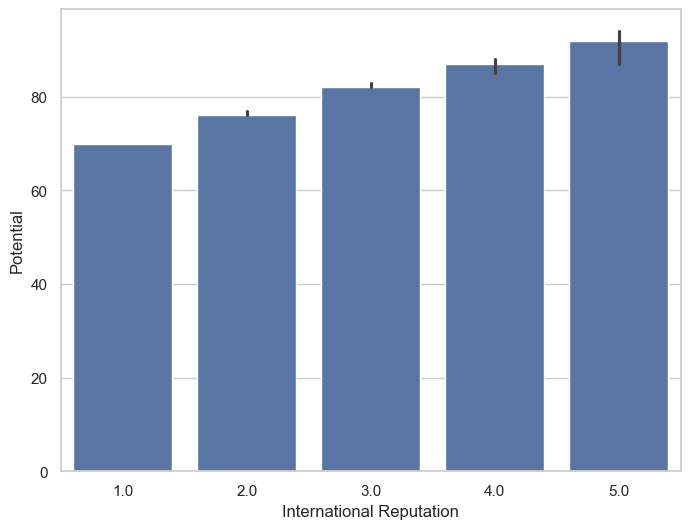

In [69]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, estimator=median)
plt.show()

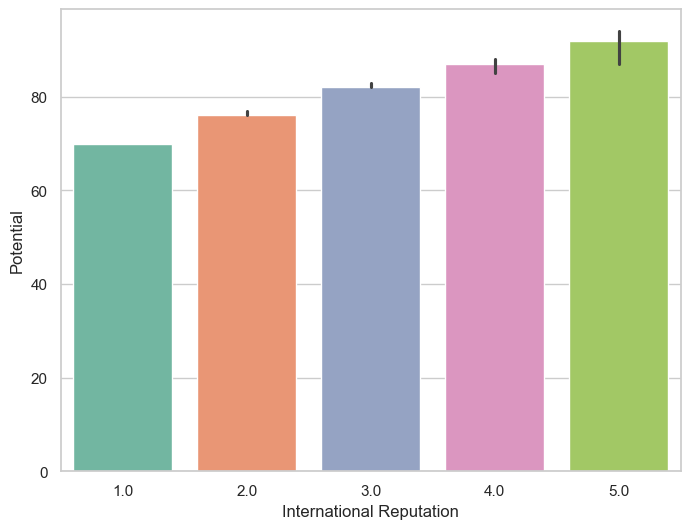

In [70]:
from numpy import median
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, estimator=median, palette="Set2")
plt.show()

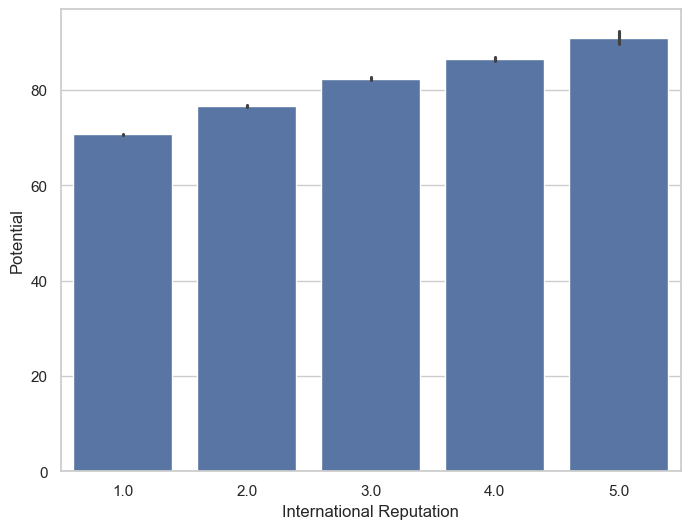

In [71]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci=68)
plt.show()

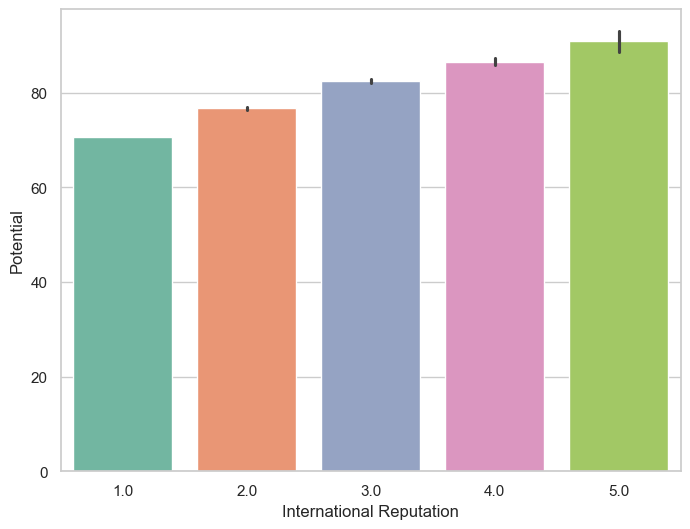

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci=90, palette="Set2")
plt.show()

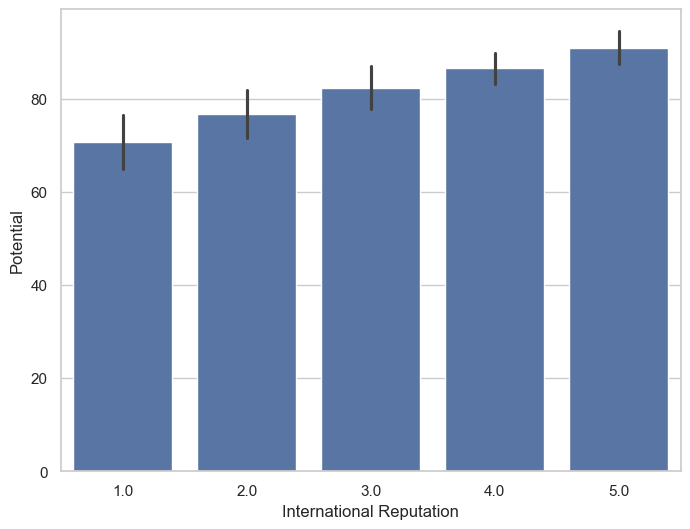

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci="sd")
plt.show()

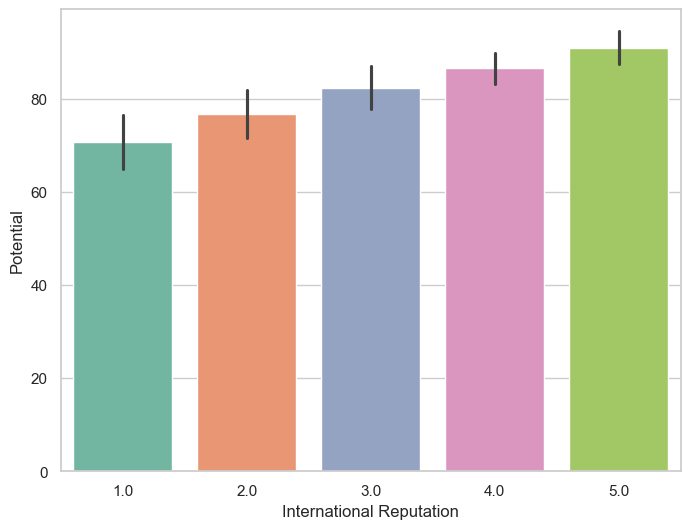

In [74]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, ci="sd", palette="Set2")
plt.show()

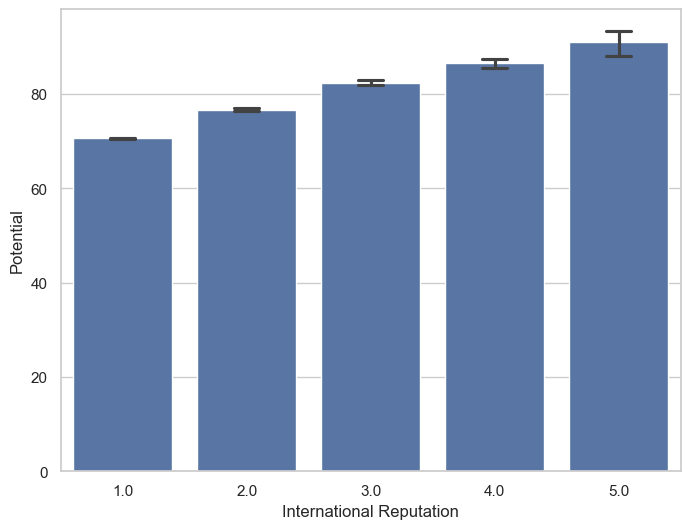

In [75]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, capsize=0.2)
plt.show()

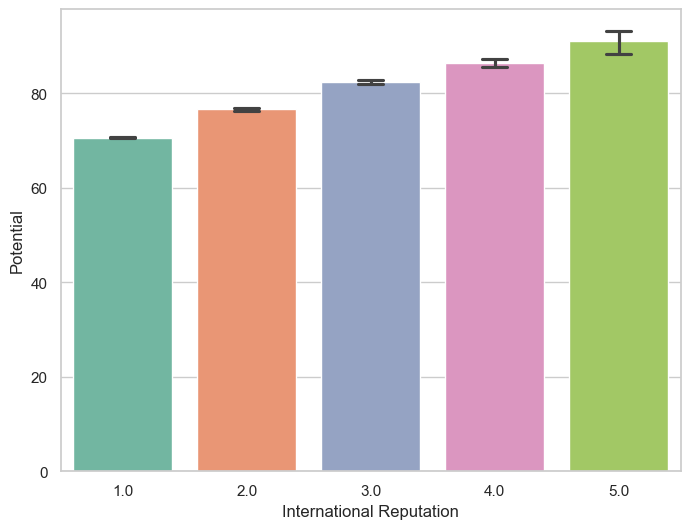

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="International Reputation", y="Potential", data=fifa19, capsize=0.2, palette="Set2")
plt.show()

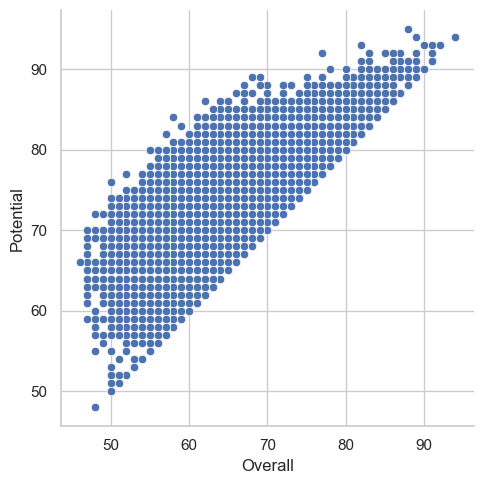

In [77]:
g = sns.relplot(x="Overall", y="Potential", data=fifa19)
plt.show()

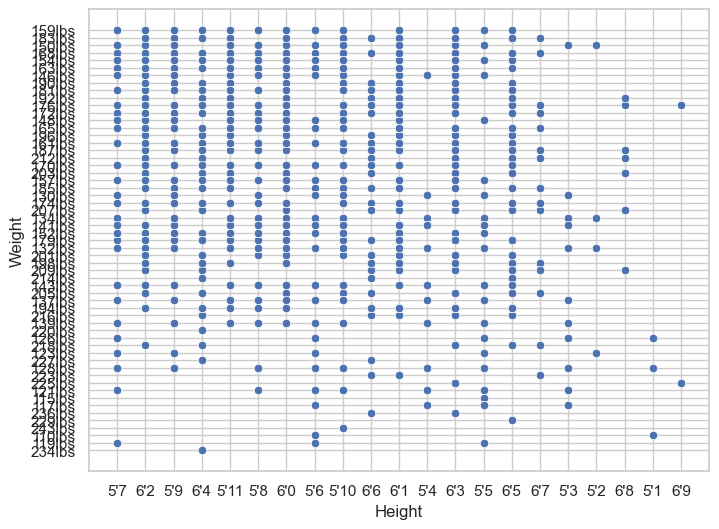

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Height", y="Weight", data=fifa19)
plt.show()

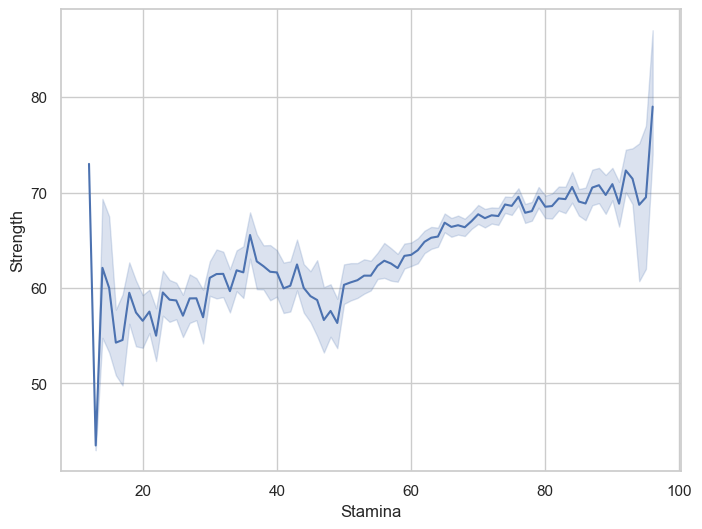

In [79]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=fifa19)
plt.show()

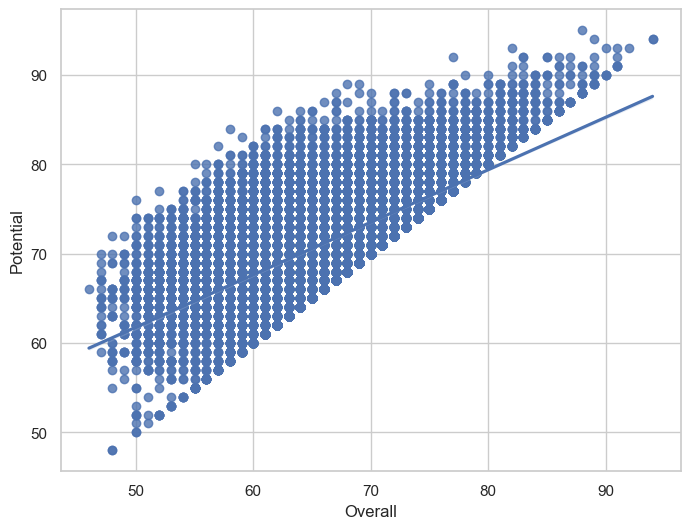

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19)
plt.show()

In [81]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19, color= "g", marker="+")
plt.show()

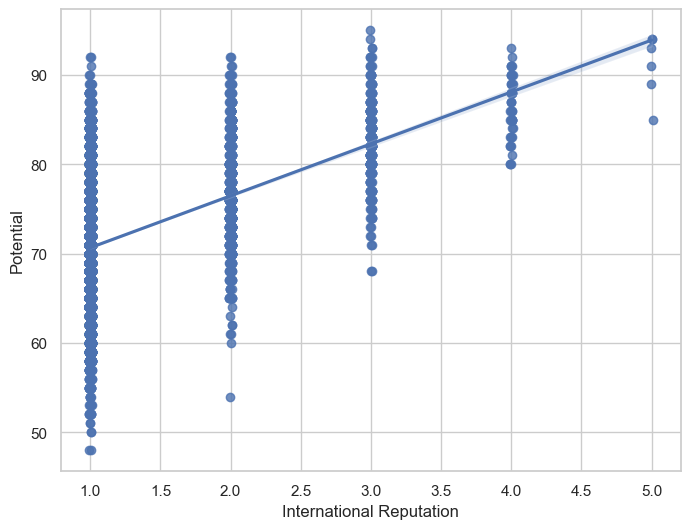

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="International Reputation", y="Potential", data=fifa19, x_jitter=.01)
plt.show()

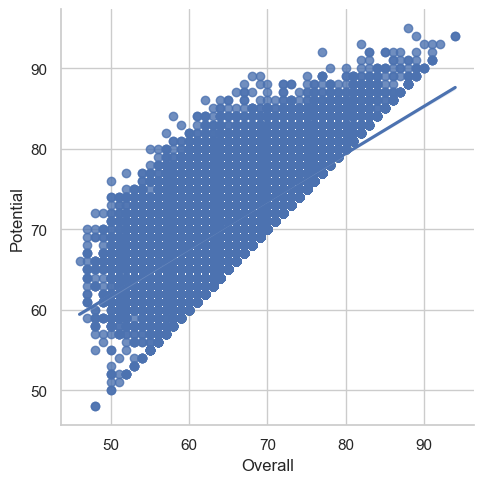

In [83]:
g= sns.lmplot(x="Overall", y="Potential", data=fifa19)
plt.show()

In [84]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19)
plt.show()

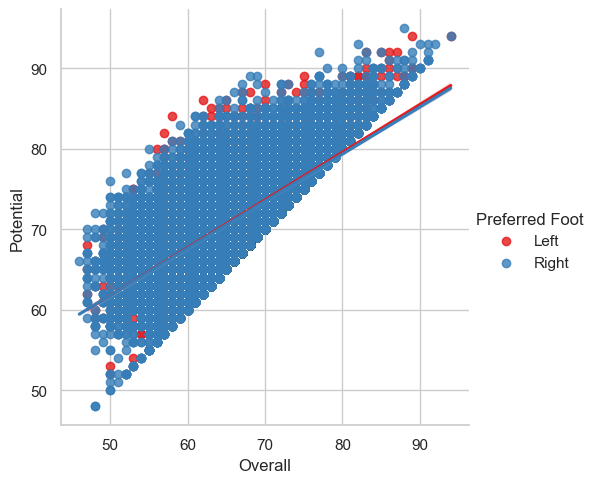

In [85]:
g= sns.lmplot(x="Overall", y="Potential", hue="Preferred Foot", data=fifa19, palette="Set1")
plt.show()

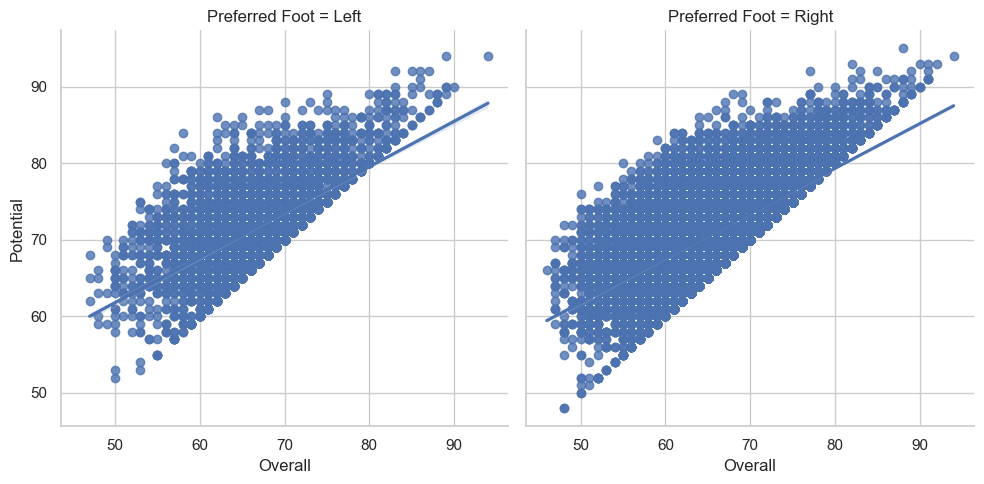

In [86]:
g= sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19)
plt.show()

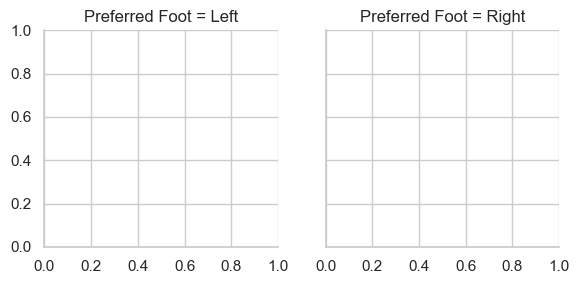

In [87]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
plt.show()

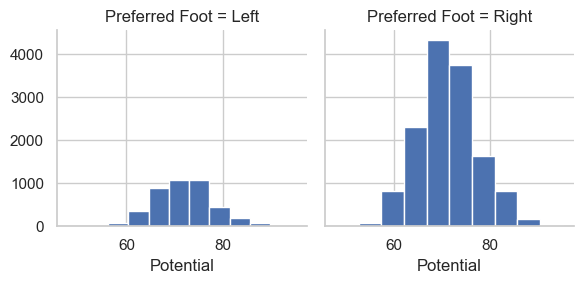

In [88]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential")
plt.show()

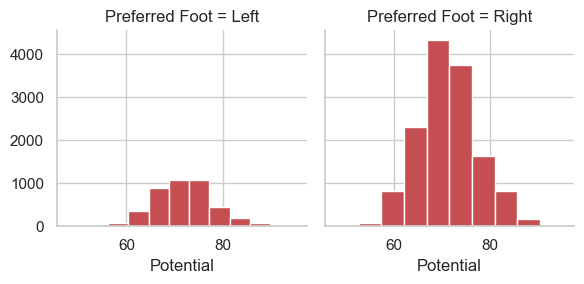

In [89]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = g.map(plt.hist, "Potential", bins=10, color="r")
plt.show()

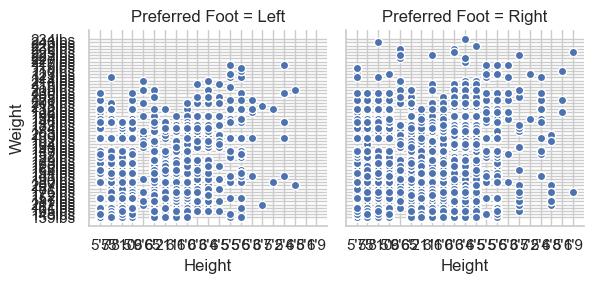

In [90]:
g = sns.FacetGrid(fifa19, col="Preferred Foot")
g = (g.map(plt.scatter, "Height", "Weight", edgecolor="w").add_legend())
plt.show()

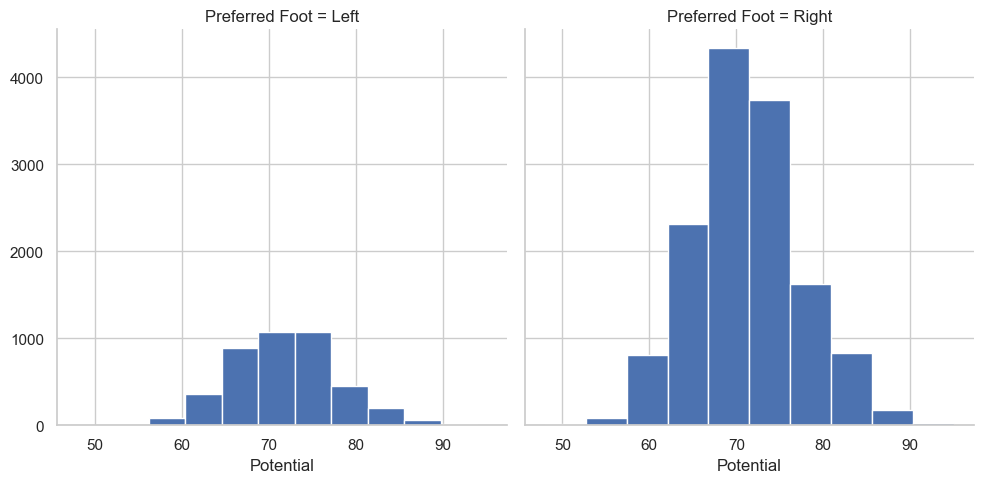

In [91]:
g = sns.FacetGrid(fifa19, col="Preferred Foot", height=5, aspect=1)
g = g.map(plt.hist, "Potential")
plt.show()

In [101]:
# Select relevant numeric columns (you can modify these)
fifa19_new = fifa19[['Age', 'Overall', 'Potential', 'SprintSpeed', 'Stamina']].dropna()

# Set Seaborn style
sns.set_style("ticks")

# Create PairGrid
g = sns.PairGrid(fifa19_new)
g.map(plt.scatter)

# Show the plot
plt.show()

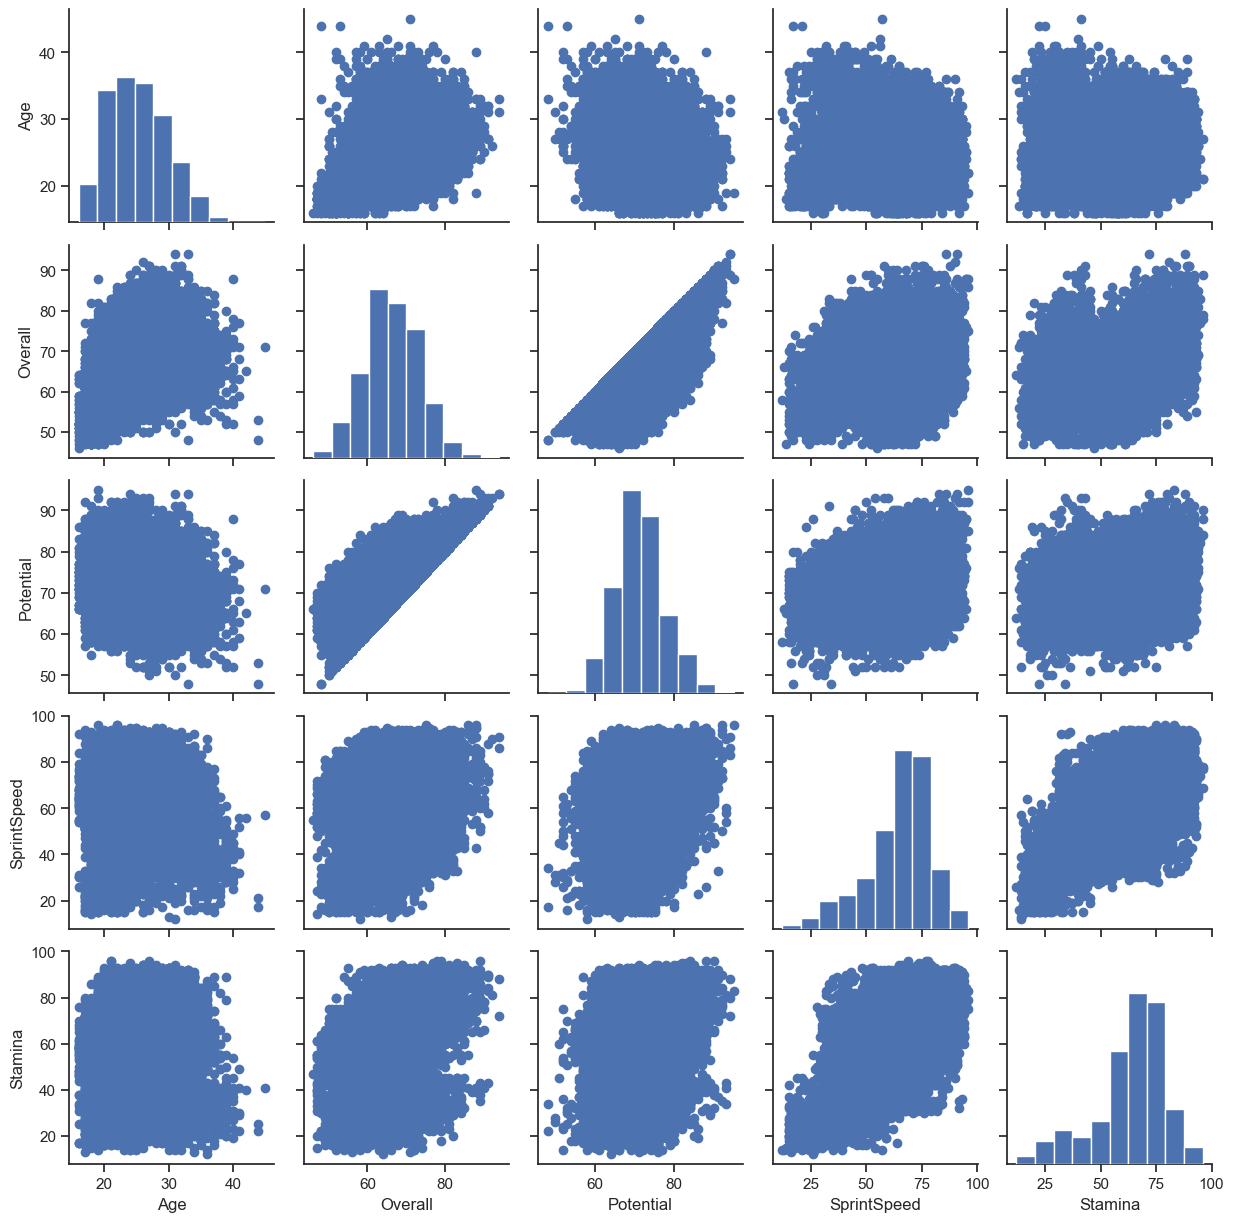

In [102]:
# Assuming fifa19_new is a DataFrame already defined
# Select relevant numeric columns (you can modify these)
fifa19_new = fifa19[['Age', 'Overall', 'Potential', 'SprintSpeed', 'Stamina']].dropna()

# Set Seaborn style
sns.set_style("ticks")

g = sns.PairGrid(fifa19_new)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.show()  # <-- Required to display the plot

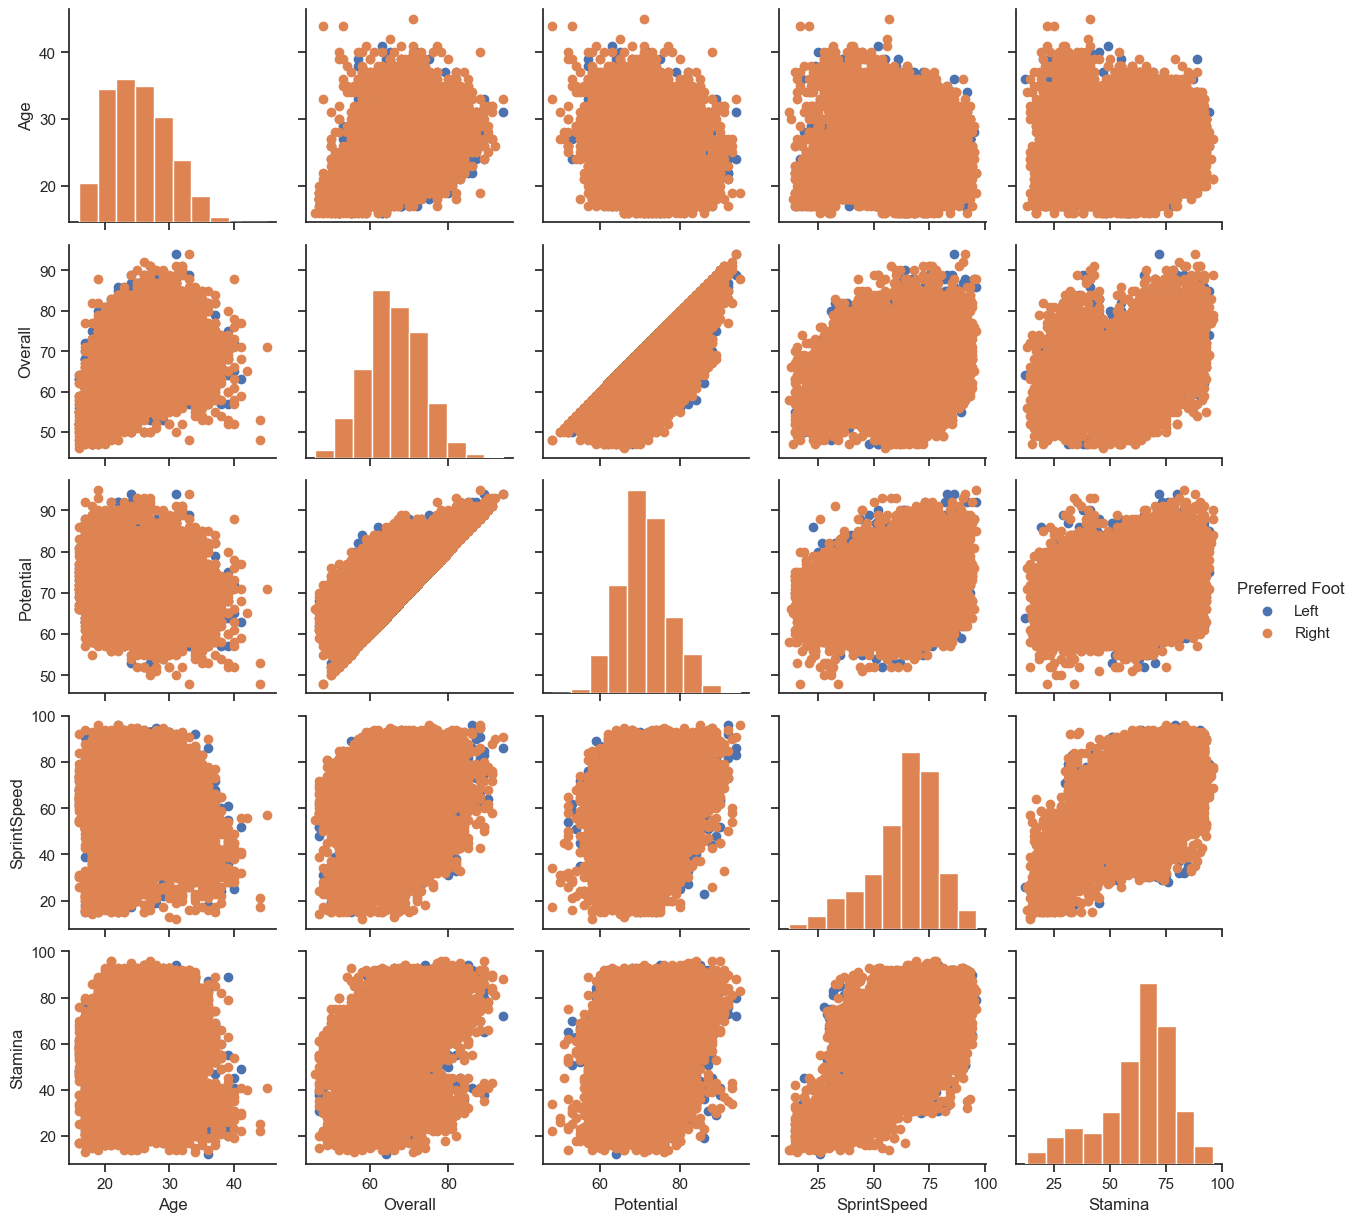

In [108]:
# Filter numeric columns and ensure Preferred Foot exists
fifa19_new = fifa19[['Age', 'Overall', 'Potential', 'SprintSpeed', 'Stamina', 'Preferred Foot']].dropna()

# Set the visual style
sns.set_style("ticks")

# Create PairGrid with hue as Preferred Foot
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

# Show the plot
plt.show()

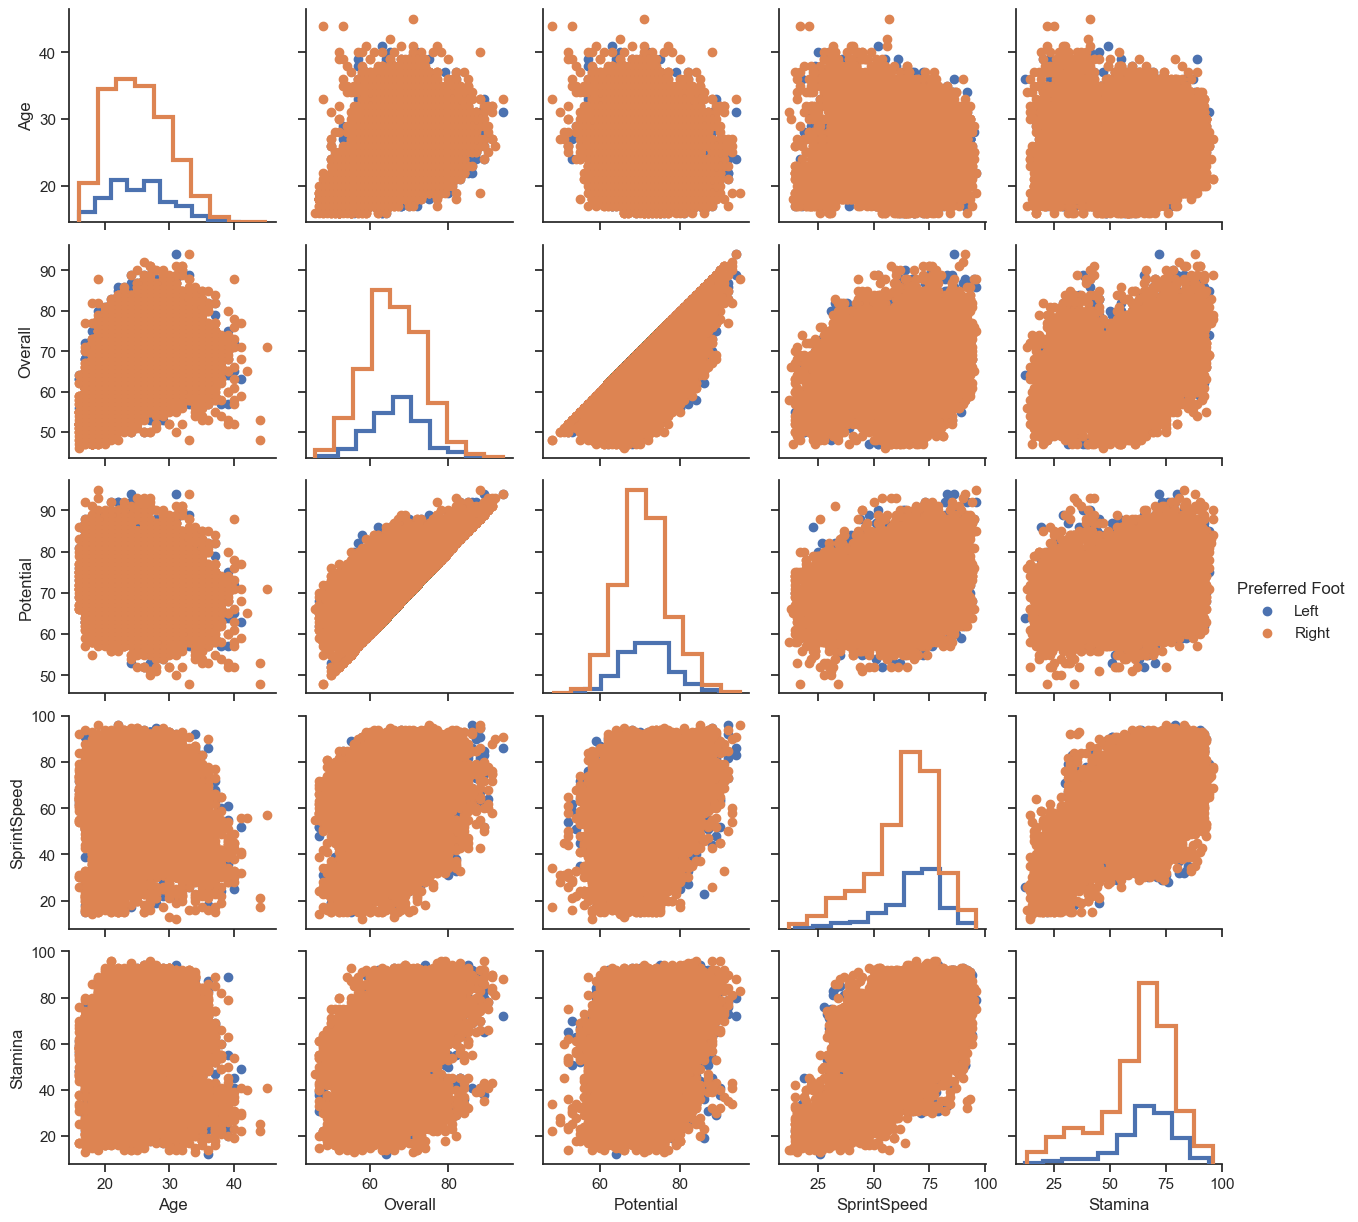

In [109]:
# Filter numeric columns and ensure Preferred Foot exists
fifa19_new = fifa19[['Age', 'Overall', 'Potential', 'SprintSpeed', 'Stamina', 'Preferred Foot']].dropna()

# Set the visual style
sns.set_style("ticks")
g = sns.PairGrid(fifa19_new, hue="Preferred Foot")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

In [110]:
g = sns.PairGrid(fifa19_new, vars=['Age', 'Stamina'])
g = g.map(plt.scatter)
plt.show()

In [121]:
# Filter numeric columns and ensure Preferred Foot exists
fifa19_new = fifa19[['Age', 'Overall', 'Potential', 'SprintSpeed', 'Stamina', 'Preferred Foot']].dropna()
# Set the visual style
sns.set_style("ticks")  
g = sns.PairGrid(fifa19_new)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

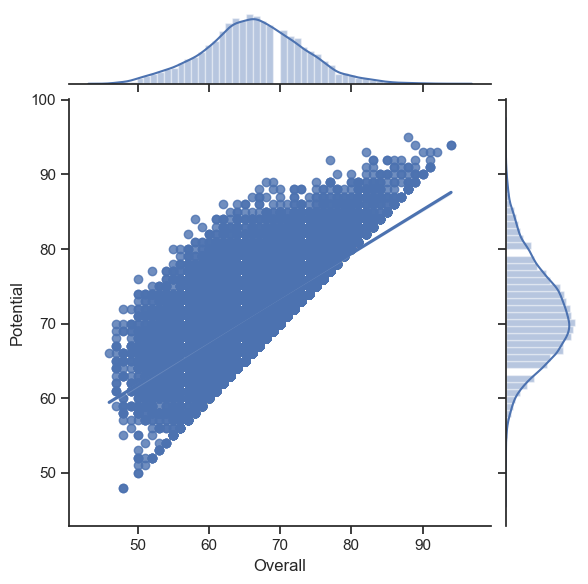

In [122]:
# Filter numeric columns and ensure Preferred Foot exists
fifa19_new = fifa19[['Age', 'Overall', 'Potential', 'SprintSpeed', 'Stamina', 'Preferred Foot']].dropna()

# Set the visual style
sns.set_style("ticks")
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot(sns.regplot, sns.distplot)
plt.show()

In [123]:
import matplotlib.pyplot as plt

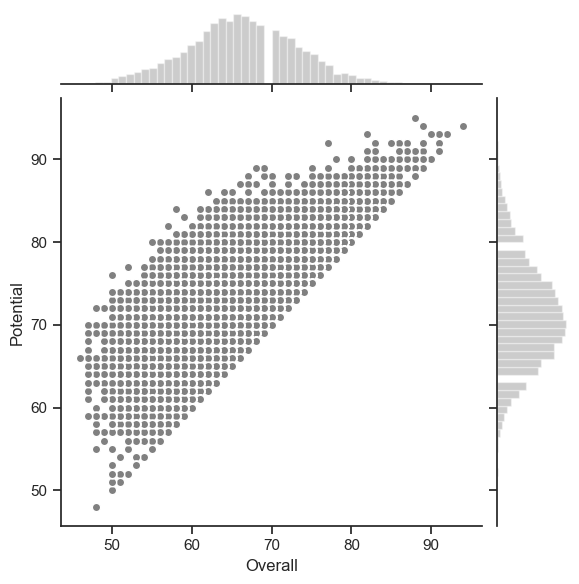

In [124]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19)
g = g.plot_joint(plt.scatter, color=".5", edgecolor="white")
g = g.plot_marginals(sns.distplot, kde=False, color=".5")
plt.show()

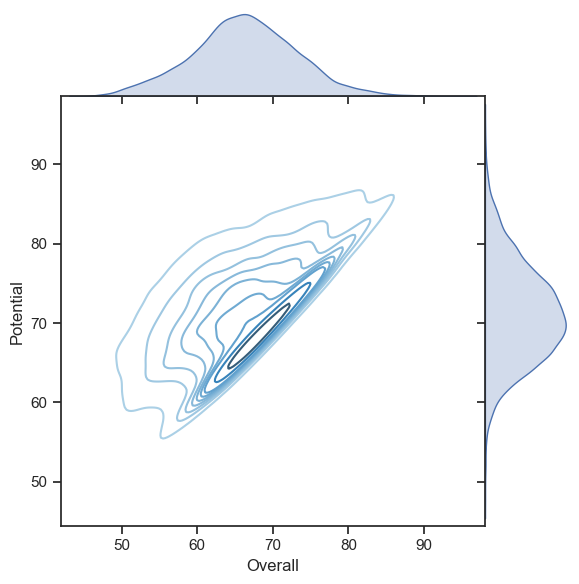

In [125]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)
plt.show()

In [126]:
g = sns.JointGrid(x="Overall", y="Potential", data=fifa19, height=5, ratio=2)
g = g.plot_joint(sns.kdeplot, cmap="Reds_d")
g = g.plot_marginals(sns.kdeplot, color="r", shade=True)
plt.show()

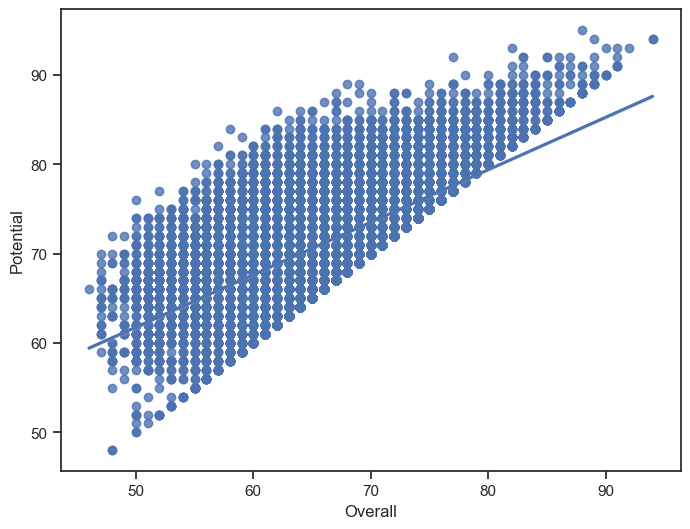

In [127]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="Overall", y="Potential", data=fifa19);
plt.show()

In [128]:
sns.lmplot(x="Overall", y="Potential", col="Preferred Foot", data=fifa19, col_wrap=2, height=5, aspect=1)
plt.show()

In [138]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        plt.show()

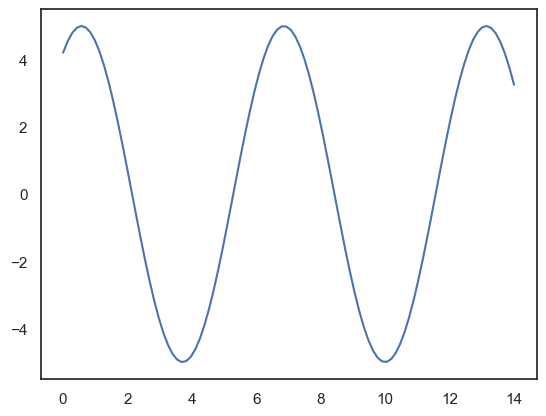

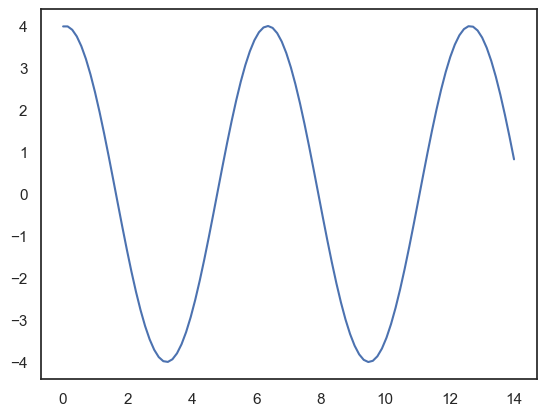

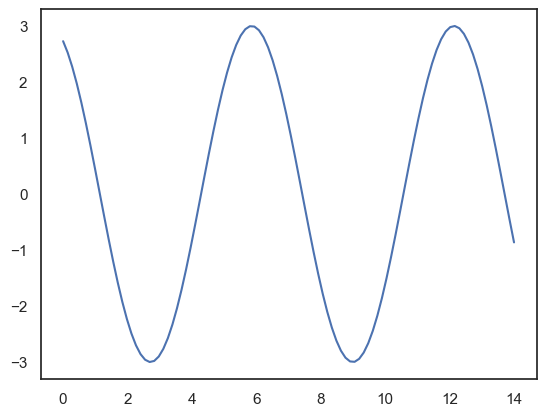

In [ ]:
sinplot()

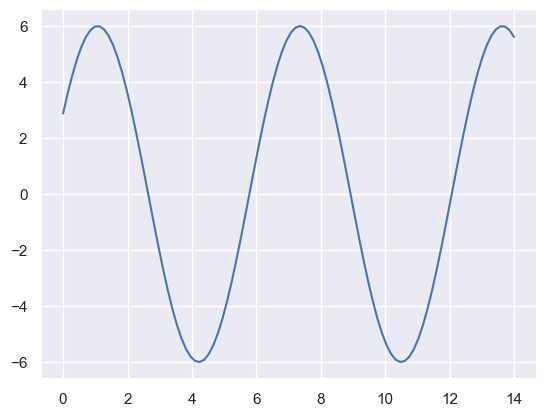

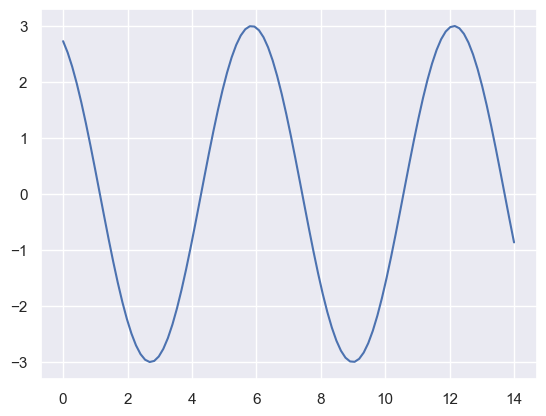

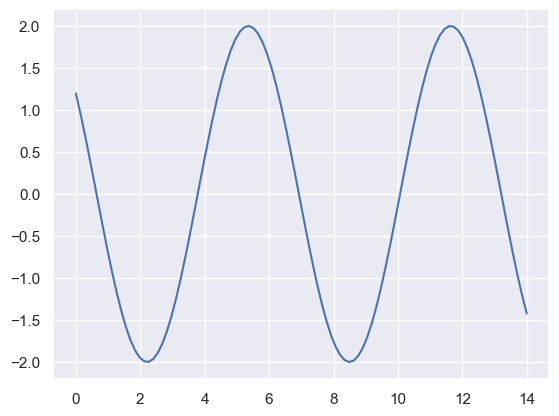

In [134]:
sns.set()
sinplot()

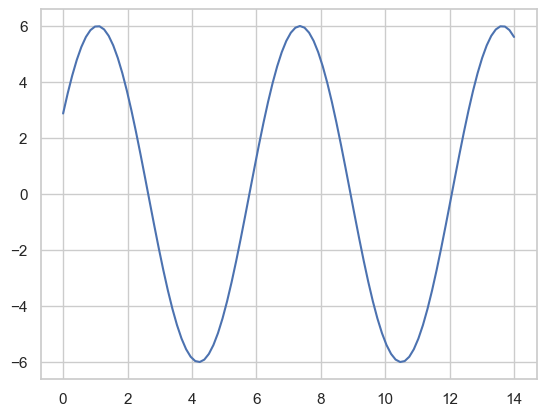

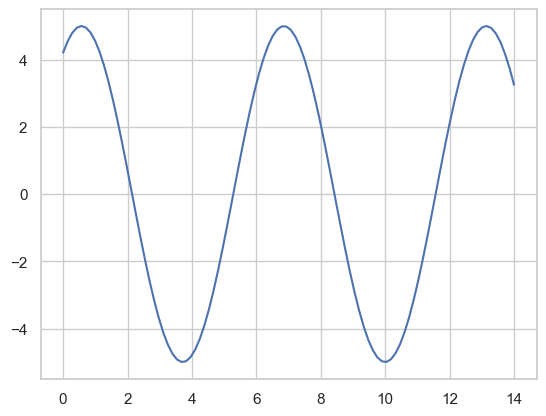

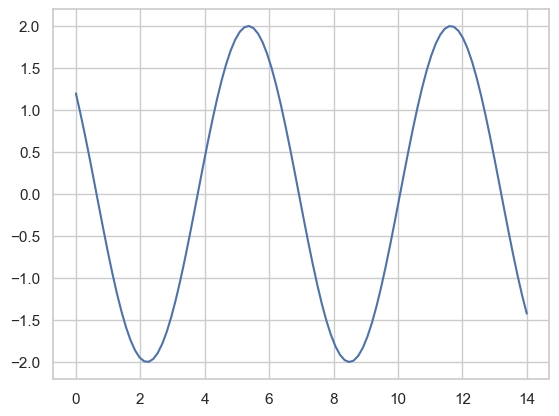

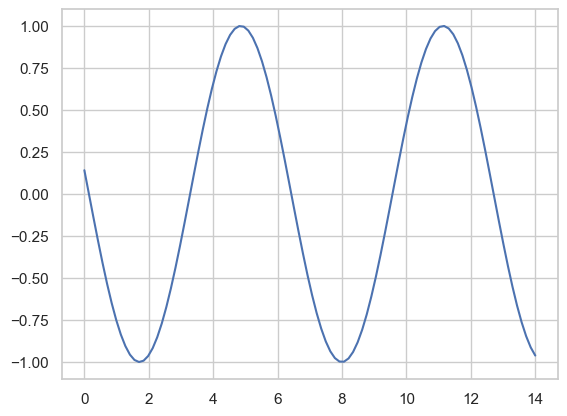

In [135]:
sns.set_style("whitegrid")
sinplot()

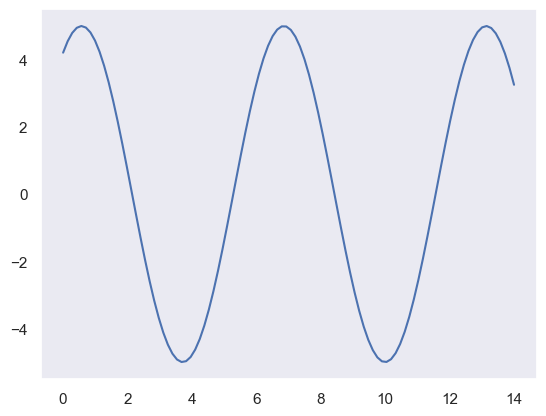

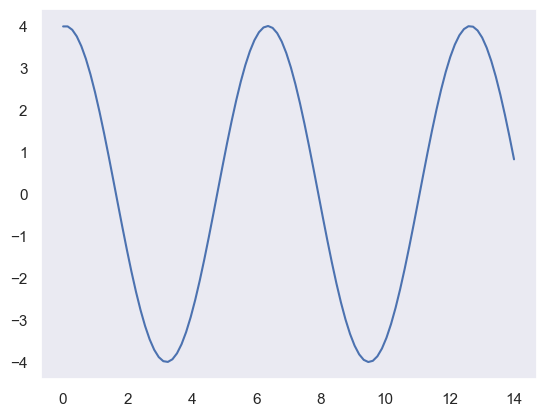

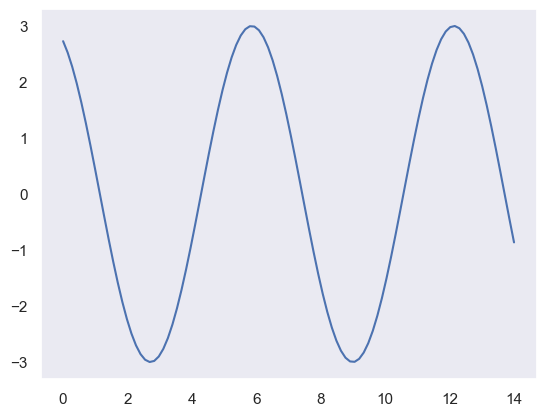

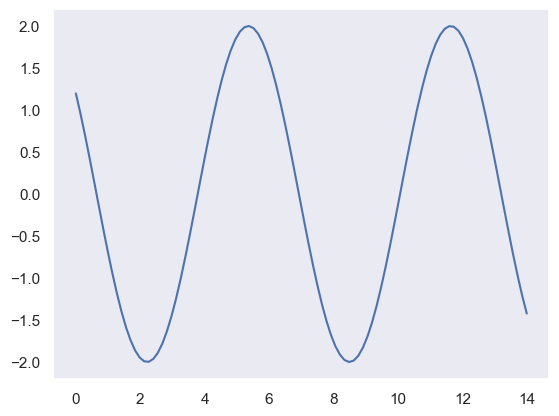

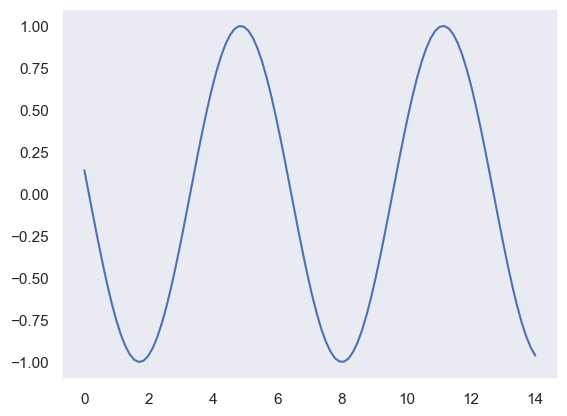

In [136]:
sns.set_style("dark")
sinplot()

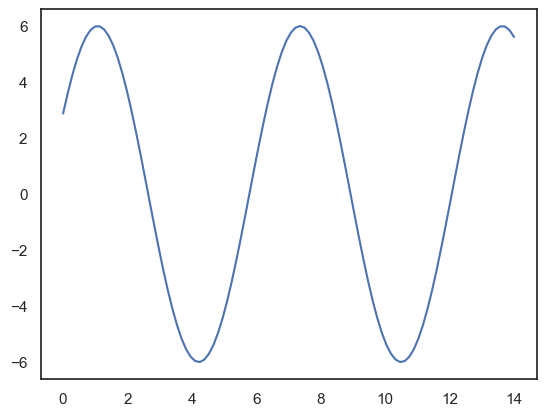

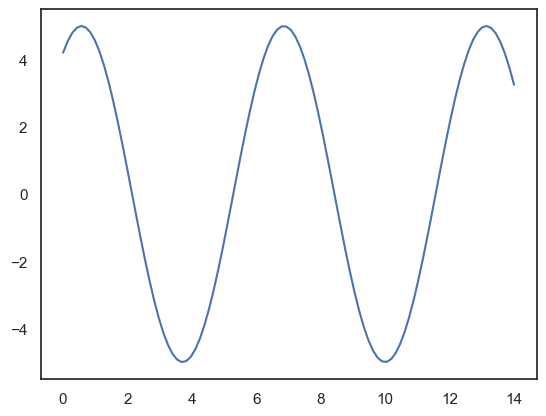

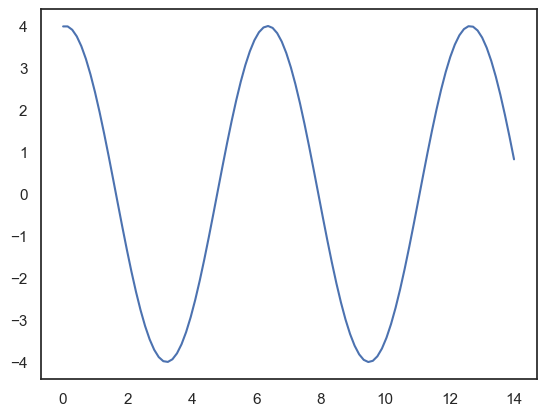

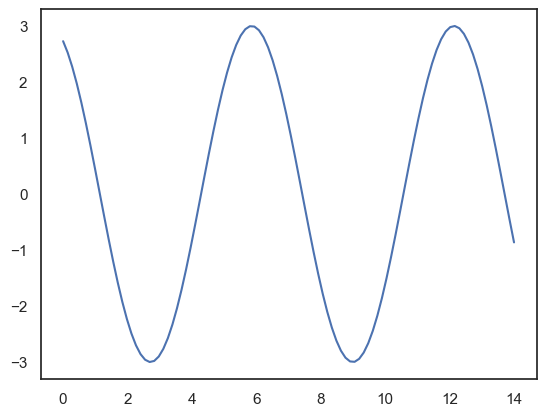

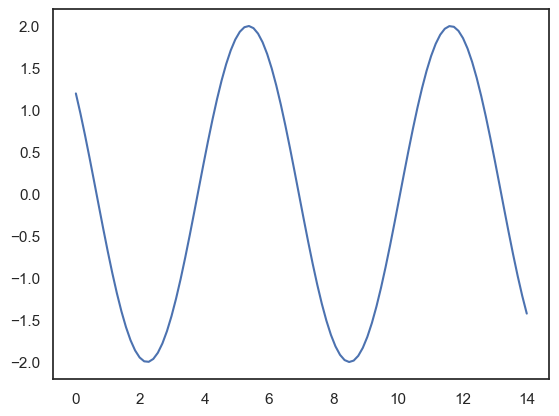

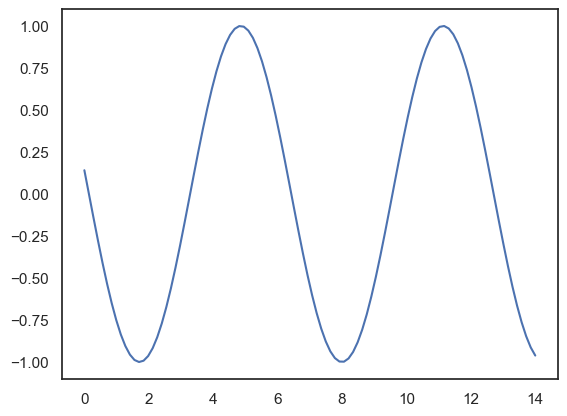

In [137]:
sns.set_style("white")
sinplot()

In [ ]:
sns.set_style("ticks")
sinplot()